In [138]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wntr as wn
import networkx as nx
from collections import defaultdict
import tensorflow as tf
import math

in2_ft2 = 0.0005787

In [139]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [140]:
#toplevelpath = "/Users/kavyaub/Documents/mySubjects/ConEdison"
toplevelpath = "/Users/aya/Documents/code-pfs/gas-nx"

all_datadir = "/NYU_LeakData"

def ask_user_path(pathinput, datadirinput):
    ask_user_path_text = 'FilePath for Data is: ' + pathinput + datadirinput + ' OK? y / n '
    response = 'y'
    user_inputYN = input(ask_user_path_text)
    if user_inputYN.lower() not in response:
        new_input = 'PASTE FULL PATH TO YOUR DATA DIRECTORY HERE: '
        newpath = input(new_input)
        return newpath
    elif user_inputYN in response:
        response2 = pathinput + datadirinput
        return response2

#datadirpath = ask_user_path(toplevelpath, all_datadir)
get_file_datadirpath = ask_user_path(toplevelpath, all_datadir)


FilePath for Data is: /Users/aya/Documents/code-pfs/gas-nx/NYU_LeakData OK? y / n 


In [197]:

anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nodeArr=pd.read_csv(anomalyFreeNode)

anomalyFree = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)


In [142]:
def get_file(name):
    anomaly = get_file_datadirpath+name
    nFile=pd.read_csv(anomaly)
    return nFile

In [143]:
def flowDeviation_vel(file0, file1):
    res_arr = file1
    res_arr['VELOpipeFPS']= file1.VELOpipeFPS
    dividend = max(file0['VELOpipeFPS'])
    res_arr.VELOpipeFPS = abs(res_arr.VELOpipeFPS.subtract(file0.VELOpipeFPS))/dividend
    return res_arr

In [144]:
def trialJulyflowDeviation_vel(file0, file1, file2, file3):
    pipe_array = np.array([file0['VELOpipeFPS'],file1['VELOpipeFPS'],file2['VELOpipeFPS'],file3['VELOpipeFPS'],[0]*file0.NAME.size,[0]*file0.NAME.size,[0]*file0.NAME.size,[0]*file0.NAME.size,[0]*file0.NAME.size,[0]*file0.NAME.size])
    for i in range(0, len(pipe_array[0])):
        temp_arr = pipe_array[0:3,i]
        min_value = np.min(temp_arr)
        pipe_array[4][i]=min_value
                
    return pipe_array

In [337]:
for i in range(0, len(pipearray_tester_new[0])):
    arr = pipearray_tester_new[0:5,i]
    filter_arr = arr <= arr[4]
    newarr = arr[filter_arr]
    print(arr[4])
    print(filter_arr)
    print(newarr)
    

0.0008380669511605569
[ True False False False  True]
[0.0008380669511605569 0.0008380669511605569]
0.00013613418457748767
[False  True False False  True]
[0.00013613418457748767 0.00013613418457748767]
0.00013613418457748767
[False  True False False  True]
[0.00013613418457748767 0.00013613418457748767]
3.799744605014415e-05
[False  True False False  True]
[3.799744605014415e-05 3.799744605014415e-05]
0.0005376765095660548
[ True False False False  True]
[0.0005376765095660548 0.0005376765095660548]
0.00015007497365981205
[ True False False False  True]
[0.00015007497365981205 0.00015007497365981205]
0.00015007497365981088
[ True False False False  True]
[0.00015007497365981088 0.00015007497365981088]
0.0002031872007870851
[ True False False False  True]
[0.0002031872007870851 0.0002031872007870851]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.000368389820220081
[ True False False False  True]
[0.000368389820220081 0.000368389820220081]
0.0
[ True  True  True  True  Tru

0.00028312488589163457
[ True False False False  True]
[0.00028312488589163457 0.00028312488589163457]
0.00044804100778938756
[ True False False False  True]
[0.00044804100778938756 0.00044804100778938756]
0.00037284634725255167
[ True False False False  True]
[0.00037284634725255167 0.00037284634725255167]
0.0010918134207169832
[ True False False False  True]
[0.0010918134207169832 0.0010918134207169832]
0.00044573980718398866
[ True False False False  True]
[0.00044573980718398866 0.00044573980718398866]
0.0006919535007044637
[ True False False False  True]
[0.0006919535007044637 0.0006919535007044637]
0.0002461842562065657
[ True False False False  True]
[0.0002461842562065657 0.0002461842562065657]
0.0002059112462572284
[ True False False False  True]
[0.0002059112462572284 0.0002059112462572284]
0.00020591124625722376
[ True False False False  True]
[0.00020591124625722376 0.00020591124625722376]
0.000578757593509772
[ True False False False  True]
[0.000578757593509772 0.00057875

[0.0020501617270723346 0.0020501617270723346]
0.0010961428361065614
[ True False False False  True]
[0.0010961428361065614 0.0010961428361065614]
0.0006193037988699103
[ True False False False  True]
[0.0006193037988699103 0.0006193037988699103]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.001193310130581462
[ True False False False  True]
[0.001193310130581462 0.001193310130581462]
0.000619303798869901
[ True False False False  True]
[0.000619303798869901 0.000619303798869901]
0.002534630350483264
[ True False False False  True]
[0.002534630350483264 0.002534630350483264]
0.000619303798869901
[ True False False False  True]
[0.000619303798869901 0.000619303798869901]
0.003964302906353981
[ True False False False  True]
[0.003964302906353981 0.003964302906353981]
0.0047172774416970945
[ True False False False  True]
[0.0047172774416970945 0.0047172774416970945]
0.001915338568179975
[ True False False False  True]
[0.001915338568179975 0.001915338568179975]
0.004049799227

[0.008212640669955132 0.008212640669955132]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0
[False False False  True  True]
[0 0]
0.009483561835218363
[ True False False False  True]
[0.009483561835218363 0.009483561835218363]
0.021522144828367548
[ True False False False  True]
[0.021522144828367548 0.021522144828367548]
0.0178319927153035
[ True False False False  True]
[0.0178319927153035 0.0178319927153035]
0.000622150463150567
[ True False False False  True]
[0.000622150463150567 0.000622150463150567]
0.004121745827717025
[False False  True False  True]
[0.004121745827717025 0.004121745827717025]
0.0037362596311515854
[False False  True False  True]
[0.0037362596311515854 0.0037362596311515854]
0
[False False False  True  True]
[0 0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0011279937731414622
[ True False False False  True]
[0.0011279937731414622 0.0011279937731414622]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.00112796915144515
[ T

[ True False False False  True]
[0.0010386688792729387 0.0010386688792729387]
0.0006416516541899222
[ True False False False  True]
[0.0006416516541899222 0.0006416516541899222]
0.0011663263600506808
[ True False False False  True]
[0.0011663263600506808 0.0011663263600506808]
0.0011654237263001945
[ True False False False  True]
[0.0011654237263001945 0.0011654237263001945]
8.40515142143125e-07
[ True False False False  True]
[8.40515142143125e-07 8.40515142143125e-07]
0.001037865041155107
[ True False False False  True]
[0.001037865041155107 0.001037865041155107]
0.0006416516541899222
[ True False False False  True]
[0.0006416516541899222 0.0006416516541899222]
7.365770234268274e-05
[ True False False False  True]
[7.365770234268274e-05 7.365770234268274e-05]
0.0011323712283852689
[ True False False False  True]
[0.0011323712283852689 0.0011323712283852689]
0.0010587259974518916
[ True False False False  True]
[0.0010587259974518916 0.0010587259974518916]
8.40515142143125e-07
[ True 

[False  True False False  True]
[8.388499794557311e-05 8.388499794557311e-05]
0.0001627317355321539
[False  True False False  True]
[0.0001627317355321539 0.0001627317355321539]
7.507866781960887e-05
[False  True False False  True]
[7.507866781960887e-05 7.507866781960887e-05]
2.2775069088591793e-05
[ True False False False  True]
[2.2775069088591793e-05 2.2775069088591793e-05]
9.038624716133855e-05
[False  True False False  True]
[9.038624716133855e-05 9.038624716133855e-05]
7.507866781960887e-05
[False  True False False  True]
[7.507866781960887e-05 7.507866781960887e-05]
7.437653869716796e-05
[ True False False False  True]
[7.437653869716796e-05 7.437653869716796e-05]
0.00011032982117406612
[ True False False False  True]
[0.00011032982117406612 0.00011032982117406612]
0.0001340113182002628
[ True False False False  True]
[0.0001340113182002628 0.0001340113182002628]
0.00017140194943867393
[ True False False False  True]
[0.00017140194943867393 0.00017140194943867393]
0.0
[ True  T

[ True False False False  True]
[0.00017109616767207683 0.00017109616767207683]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
2.508243030263159e-05
[ True False False False  True]
[2.508243030263159e-05 2.508243030263159e-05]
0.0002126083476540804
[ True False False False  True]
[0.0002126083476540804 0.0002126083476540804]
5.410200255547493e-05
[ True False False False  True]
[5.410200255547493e-05 5.410200255547493e-05]
5.410200255547493e-05
[ True False False False  True]
[5.410200255547493e-05 5.410200255547493e-05]
4.454095381203218e-05
[ True False False False  True]
[4.454095381203218e-05 4.454095381203218e-05]
7.706590945654674e-05
[ True False False False  True]
[7.706590945654674e-05 7.706590945654674e-05]
3.8065142498345876e-05
[ True False False False  True]
[3.8065142498345876e-05 3.8065142498345876e-05]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
2.508243030263159e-05
[ True False False False  True]
[2.508243030263159e-05 2.508243030263159e-05]
0

[ True False False False  True]
[2.4444389882109407e-06 2.4444389882109407e-06]
2.4444389882202203e-06
[ True False False False  True]
[2.4444389882202203e-06 2.4444389882202203e-06]
0.002290424206403207
[ True False False False  True]
[0.002290424206403207 0.002290424206403207]
0.0027031402241635637
[ True False False False  True]
[0.0027031402241635637 0.0027031402241635637]
0.0012470305498379828
[ True False False False  True]
[0.0012470305498379828 0.0012470305498379828]
0.0027031402241635637
[ True False False False  True]
[0.0027031402241635637 0.0027031402241635637]
0.002290424206403207
[ True False False False  True]
[0.002290424206403207 0.002290424206403207]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
1.9990420856983496e-05
[False Fal

[ True False False False  True]
[0.004274875643240532 0.004274875643240532]
0.0004090894842238115
[ True False False False  True]
[0.0004090894842238115 0.0004090894842238115]
0.00022563529882886423
[ True False False False  True]
[0.00022563529882886423 0.00022563529882886423]
0.0020118466116259733
[ True False False False  True]
[0.0020118466116259733 0.0020118466116259733]
0.007450256209798463
[ True False False False  True]
[0.007450256209798463 0.007450256209798463]
0.0005120974756865957
[ True False False False  True]
[0.0005120974756865957 0.0005120974756865957]
0.0005120974756865957
[ True False False False  True]
[0.0005120974756865957 0.0005120974756865957]
0.004110744263267848
[ True False False False  True]
[0.004110744263267848 0.004110744263267848]
0.003438296781488657
[ True False False False  True]
[0.003438296781488657 0.003438296781488657]
0.003438296781488657
[ True False False False  True]
[0.003438296781488657 0.003438296781488657]
0.00021478470576450864
[ True Fal

0.0039075579446114
[ True False False False  True]
[0.0039075579446114 0.0039075579446114]
0.004529721987978574
[ True False False False  True]
[0.004529721987978574 0.004529721987978574]
0.004529721987978574
[ True False False False  True]
[0.004529721987978574 0.004529721987978574]
0.0006221504631505713
[ True False False False  True]
[0.0006221504631505713 0.0006221504631505713]
0.0006221504631505713
[ True False False False  True]
[0.0006221504631505713 0.0006221504631505713]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0
[ True  True  True  True  True]
[0.0 0.0 0.0 0.0 0.0]
0.0018480637761736961
[ True False False False  True]
[0.0018480637761736961 0.0018480637761736961]
0.0018480637761736961
[ True False False False  True]
[0.0018480637761736961 0.0018480637761736961]
0.0034593836363387446
[ T

In [147]:
preDir = "/ReducedNodeSet/"
name500="CECnodes_500_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)

In [148]:
preDir = "/ReducedNodeSet/"
name200="CECnodes_200_TableToExcel"
filetype = ".csv"
nodes200 = get_file(preDir+name200+filetype)

In [149]:
def calculations(input_arr):
    final_temp_arr = np.array([input_arr['NAME'],input_arr['FacilityFromNodeName'],input_arr['FacilityToNodeName'],input_arr['NAME'],[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size])

    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    setOfNames = set(nodeArr['NAME'])

    for i in range(0,final_temp_arr[1].size):
        if final_temp_arr[1][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[1][i]]
            final_temp_arr[4][i]=temp.iloc[0][3]
            final_temp_arr[5][i]=temp.iloc[0][2]
        if final_temp_arr[2][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[2][i]]
            final_temp_arr[6][i]=temp.iloc[0][3]
            final_temp_arr[7][i]=temp.iloc[0][2]
            
    mid_elem_x=(final_temp_arr[4]+final_temp_arr[6])/2.0
    mid_elem_y=(final_temp_arr[5]+final_temp_arr[7])/2.0
    
    final_temp_arr[8]=mid_elem_x
    final_temp_arr[9]=mid_elem_y
    input_arr['mid_point_x']=mid_elem_x
    input_arr['mid_point_y']=mid_elem_y

In [150]:
def reducer(input_arr):
    
    unique_nodes = nodes200.NAME.unique()
    reduced_nodeArr = input_arr[input_arr.FacilityFromNodeName.isin(unique_nodes)]
    reduced_nodeArr1 = input_arr[input_arr.FacilityToNodeName.isin(unique_nodes)]

    reduced_nodeArr.reset_index(inplace = True, drop = True)
    reduced_nodeArr1.reset_index(inplace = True, drop = True)

    df=pd.merge(reduced_nodeArr,reduced_nodeArr1)
    df_new=df.drop_duplicates()
    return df_new
    

In [151]:
preDir = "/LeakData_ZeroDegrees/"
name0_11="NYU Anamoly Data_ZeroDeg_Pipes_Leak11"
name0_21="NYU Anamoly Data_ZeroDeg_Pipes_Leak21"
name0_31="NYU Anamoly Data_ZeroDeg_Pipes_Leak31"
name0_41="NYU Anamoly Data_ZeroDeg_Pipes_Leak41"
filetype = ".csv"

leak0_11 = get_file(preDir+name0_11+filetype)
leak0_21 = get_file(preDir+name0_21+filetype)
leak0_31 = get_file(preDir+name0_31+filetype)
leak0_41 = get_file(preDir+name0_41+filetype)

In [152]:
setOfNames = set(leak0_41['NAME'])
def pipe_velocity_calc(pipedf):
    final_pipedf = np.array([pipedf['NAME'],pipedf['FacilityFromNodeName'],pipedf['FacilityToNodeName'],pipedf['FacilityFlowAbsolute'],pipedf['PipeDiameter'],[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size,[0]*pipedf.NAME.size])

    for i in range(0,final_pipedf[1].size):
        if final_pipedf[0][i] in setOfNames:
            temp = pipedf.loc[pipedf['NAME']==final_pipedf[0][i]]
            final_pipedf[5][i]=temp.iloc[0][90]
            final_pipedf[6][i]=temp.iloc[0][94]

    ## Creating the Velocity Rate Column ##
    elem_AREApipeFT2 = (final_pipedf[6]**2/4*math.pi*in2_ft2)
    elem_VELOpipeFPS = (final_pipedf[5]/elem_AREApipeFT2*1000/3600)
    final_pipedf[8] = elem_AREApipeFT2
    final_pipedf[9] = elem_VELOpipeFPS
    pipedf['AREApipeFT2'] = elem_AREApipeFT2
    pipedf['VELOpipeFPS'] = elem_VELOpipeFPS

    return pipedf

In [153]:
#preDir = "/LeakData_16Degrees/"
preDir = "/LeakData_16Degrees/"
name1="NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
name11="NYU Anamoly Data_16Deg_Pipes_Leak11.csv"
name21="NYU Anamoly Data_16Deg_Pipes_Leak21.csv"
name31="NYU Anamoly Data_16Deg_Pipes_Leak31.csv"
name41="NYU Anamoly Data_16Deg_Pipes_Leak41.csv"

leak1=get_file(preDir+name1)
leak11 = get_file(preDir+name11)
leak21 = get_file(preDir+name21)
leak31 = get_file(preDir+name31)
leak41 = get_file(preDir+name41)

In [154]:
#preDir = "/LeakData_32Degrees/"
preDir = "/LeakData_32Degrees/"
leakFree32 = "NYU Anamoly Data_32Deg_Nodes.csv"
name32_01="NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
name32_11="NYU Anamoly Data_32Deg_Pipes_Leak11.csv"
name32_21="NYU Anamoly Data_32Deg_Pipes_Leak21.csv"
name32_31="NYU Anamoly Data_32Deg_Pipes_Leak31.csv"
name32_41="NYU Anamoly Data_32Deg_Pipes_Leak41.csv"

leak32_00 = get_file(preDir+leakFree32)
leak32_01 = get_file(preDir+name32_01)
leak32_11 = get_file(preDir+name32_11)
leak32_21 = get_file(preDir+name32_21)
leak32_31 = get_file(preDir+name32_31)
leak32_41 = get_file(preDir+name32_41)

In [155]:
#preDir = "/LeakData_48Degrees/"
preDir = "/LeakData_48Degrees/"
leakFree48 = "NYU Anamoly Data_48Deg_Nodes.csv"
name48_01="NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
name48_11="NYU Anamoly Data_48Deg_Pipes_Leak11.csv"
name48_21="NYU Anamoly Data_48Deg_Pipes_Leak21.csv"
name48_31="NYU Anamoly Data_48Deg_Pipes_Leak31.csv"
name48_41="NYU Anamoly Data_48Deg_Pipes_Leak41.csv"

leak48_00 = get_file(preDir+leakFree48)
leak48_01 = get_file(preDir+name48_01)
leak48_11 = get_file(preDir+name48_11)
leak48_21 = get_file(preDir+name48_21)
leak48_31 = get_file(preDir+name48_31)
leak48_41 = get_file(preDir+name48_41)


In [156]:
#preDir = "/LeakData_64Degrees/"
preDir = "/LeakData_64Degrees/"
leakFree48 = "NYU Anamoly Data_64Deg_Nodes.csv"
name64_01="NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
name64_11="NYU Anamoly Data_64Deg_Pipes_Leak11.csv"
name64_21="NYU Anamoly Data_64Deg_Pipes_Leak21.csv"
name64_31="NYU Anamoly Data_64Deg_Pipes_Leak31.csv"
name64_41="NYU Anamoly Data_64Deg_Pipes_Leak41.csv"

leak64_00 = get_file(preDir+leakFree48)
leak64_01 = get_file(preDir+name64_01)
leak64_11 = get_file(preDir+name64_11)
leak64_21 = get_file(preDir+name64_21)
leak64_31 = get_file(preDir+name64_31)
leak64_41 = get_file(preDir+name64_41)


In [37]:
res0_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff0_1 = flowDeviation_vel(normal_vel_1,res0_1)
calculations(cal_diff0_1)

res0_11 = pipe_velocity_calc(leak0_11)
#normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff0_11 = flowDeviation_vel(normal_vel_1,res0_11)
calculations(cal_diff0_11)

res0_21 = pipe_velocity_calc(leak0_21)
#normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff0_21 = flowDeviation_vel(normal_vel_1,res0_21)
calculations(cal_diff0_21)

res0_31 = pipe_velocity_calc(leak0_31)
#normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff0_31 = flowDeviation_vel(normal_vel_1,res0_31)
calculations(cal_diff0_31)

res0_41 = pipe_velocity_calc(leak0_41)
#normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff0_41 = flowDeviation_vel(normal_vel_1,res0_41)
calculations(cal_diff0_41)

cal_diff0_1 = cal_diff0_1.fillna(value=0.0)
cal_diff0_11 = cal_diff0_11.fillna(value=0.0)
cal_diff0_21 = cal_diff0_21.fillna(value=0.0)
cal_diff0_31 = cal_diff0_31.fillna(value=0.0)
cal_diff0_41 = cal_diff0_41.fillna(value=0.0)

cal_diff0_1_500=reducer(cal_diff0_1)
cal_diff0_11_500=reducer(cal_diff0_11)
cal_diff0_21_500=reducer(cal_diff0_21)
cal_diff0_31_500=reducer(cal_diff0_31)
cal_diff0_41_500=reducer(cal_diff0_41)

In [38]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_16Degrees/NYU Anamoly Data_16Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff1 = flowDeviation_vel(normal_vel_1,res1)
calculations(cal_diff1)

res11 = pipe_velocity_calc(leak11)
#normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff11 = flowDeviation_vel(normal_vel_1,res11)
calculations(cal_diff11)

res21 = pipe_velocity_calc(leak21)
#normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff21 = flowDeviation_vel(normal_vel_1,res21)
calculations(cal_diff21)

res31 = pipe_velocity_calc(leak31)
#normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff31 = flowDeviation_vel(normal_vel_1,res31)
calculations(cal_diff31)

res41 = pipe_velocity_calc(leak41)
#normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff41 = flowDeviation_vel(normal_vel_1,res41)
calculations(cal_diff41)

cal_diff1 = cal_diff1.fillna(value=0.0)
cal_diff11 = cal_diff11.fillna(value=0.0)
cal_diff21 = cal_diff21.fillna(value=0.0)
cal_diff31 = cal_diff31.fillna(value=0.0)
cal_diff41 = cal_diff41.fillna(value=0.0)


cal_diff1_500=reducer(cal_diff1)
cal_diff11_500=reducer(cal_diff11)
cal_diff21_500=reducer(cal_diff21)
cal_diff31_500=reducer(cal_diff31)
cal_diff41_500=reducer(cal_diff41)

In [194]:
def velo_distribution_plotter(inputarr):
    
    mxV200 = max(inputarr.VELOpipeFPS)
    Vmn200 = min(inputarr.VELOpipeFPS)
    Vint200 = (mxV200 - Vmn200)/10

    emptyarr_onebyten = np.zeros([1,7])
    binarray = emptyarr_onebyten.copy()

    for i in inputarr.VELOpipeFPS:
        if Vmn200 <= i < Vmn200 + Vint200:
            binarray[0,0] = binarray[0,0]+1
        if Vmn200 + Vint200 < i < Vmn200 + 2*Vint200:
            binarray[0,1] = binarray[0,1]+1
        if Vmn200 + 2*Vint200 < i < Vmn200 + 3*Vint200:
            binarray[0,2] = binarray[0,2]+1
        if Vmn200 + 3*Vint200 < i < Vmn200 + 4*Vint200:
            binarray[0,3] = binarray[0,3]+1
        if Vmn200 + 4*Vint200 < i < Vmn200 + 5*Vint200:
            binarray[0,4] = binarray[0,4]+1
        if Vmn200 + 5*Vint200 < i < Vmn200 + 6*Vint200:
            binarray[0,5] = binarray[0,5]+1
        if Vmn200 + 6*Vint200 < i < Vmn200 + 7*Vint200:
            binarray[0,6] = binarray[0,6]+1

    freqarr = binarray/np.sum(binarray)
    Y = np.reshape(freqarr, (7, 1)).T
    cumufreqarr = [freqarr[0,0], freqarr[0,0]+freqarr[0,1], freqarr[0,0]+freqarr[0,1]+freqarr[0,2], freqarr[0,0]+freqarr[0,1]+freqarr[0,2]+freqarr[0,3], freqarr[0,0]+freqarr[0,1]+freqarr[0,2]+freqarr[0,3]+freqarr[0,4], freqarr[0,0]+freqarr[0,1]+freqarr[0,2]+freqarr[0,3]+freqarr[0,4]+freqarr[0,5], freqarr[0,0]+freqarr[0,1]+freqarr[0,2]+freqarr[0,3]+freqarr[0,4]+freqarr[0,5]+freqarr[0,6]]
    y = np.reshape(cumufreqarr, (7, 1)).T
    intarr = np.array([Vmn200+Vint200, Vmn200+2*Vint200, Vmn200+3*Vint200, Vmn200+4*Vint200, Vmn200+5*Vint200, Vmn200+6*Vint200, Vmn200+7*Vint200])
    x = np.reshape(intarr, (7, 1)).T
    alldistarr = np.concatenate((Y,y,x))
    alldistarr_round = np.round_(alldistarr, decimals = 2)

    from matplotlib.ticker import MultipleLocator
    import matplotlib.ticker as tck

    fig, ax1 = plt.subplots()

    ax1.plot(x.flatten(),y.flatten(), marker = 'o', color = 'b')
    plt.xticks(x.flatten())
    ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())

    ax1.set_xlabel('X = Upper Velocity Thresholds Value (Min ' + str(round(Vmn200, 2)) + ', Step = ' +str(round(Vint200, 2))+')')
    ax1.set_ylabel('Total Percantage of Nodes < X')
    ax1.set_title('Cumulative % of Pipes Below Thresholds of Velocity (Non-Anomaly)')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    fig, ax2 = plt.subplots()

    ax2.plot(x.flatten(),freqarr.flatten(), marker = 'o', color = 'b', linestyle = '-')
    plt.xticks(x.flatten())
    ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())

    ax2.set_xlabel('X = Upper Velocity Thresholds Value (Min ' + str(round(Vmn200, 2)) + ', Step = ' +str(round(Vint200, 2))+')')
    ax2.set_ylabel('Freq. No. of Nodes in Interval X-1 to X')
    ax2.set_title('Frequency of Pipes Within Thresholds of Velocity (Leak = 41 mSCFH)')


Current size: [10, 5]


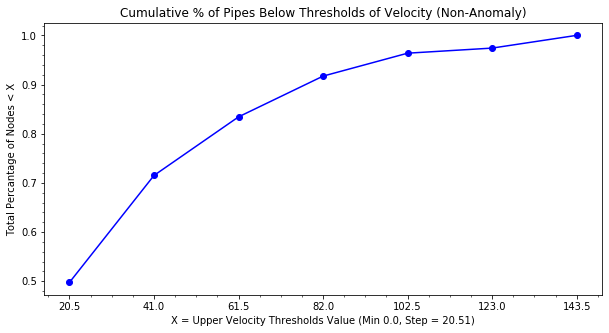

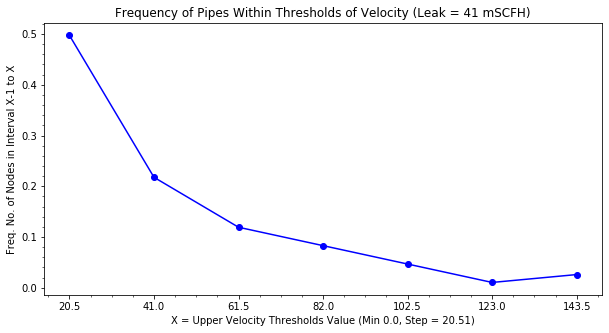

In [200]:
res1_200 = reducer(normal_vel_1)
velo_distribution_plotter(res1_200)

In [166]:
max(nFile0_200.VELOpipeFPS)

205.05563824839473

In [76]:
uanomalyFree = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_32Degrees/NYU Anamoly Data_32Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res32_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff32_1 = flowDeviation_vel(normal_vel_1,res32_1)
calculations(cal_diff32_1)

res32_11 = pipe_velocity_calc(leak32_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff32_11 = flowDeviation_vel(normal_vel_11,res32_11)
calculations(cal_diff32_11)

res32_21 = pipe_velocity_calc(leak32_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff32_21 = flowDeviation_vel(normal_vel_21,res32_21)
calculations(cal_diff32_21)

res32_31 = pipe_velocity_calc(leak32_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff32_31 = flowDeviation_vel(normal_vel_31,res32_31)
calculations(cal_diff32_31)

res32_41 = pipe_velocity_calc(leak32_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff32_41 = flowDeviation_vel(normal_vel_41,res32_41)
calculations(cal_diff32_41)

cal_diff32_1 = cal_diff32_1.fillna(value=0.0)
cal_diff32_11 = cal_diff32_11.fillna(value=0.0)
cal_diff32_21 = cal_diff32_21.fillna(value=0.0)
cal_diff32_31 = cal_diff32_31.fillna(value=0.0)
cal_diff32_41 = cal_diff32_41.fillna(value=0.0)

cal_diff32_1_500=reducer(cal_diff32_1)
cal_diff32_11_500=reducer(cal_diff32_11)
cal_diff32_21_500=reducer(cal_diff32_21)
cal_diff32_31_500=reducer(cal_diff32_31)
cal_diff32_41_500=reducer(cal_diff32_41)

In [44]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_48Degrees/NYU Anamoly Data_48Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res48_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff48_1 = flowDeviation_vel(normal_vel_1,res48_1)
calculations(cal_diff48_1)

res48_11 = pipe_velocity_calc(leak48_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff48_11 = flowDeviation_vel(normal_vel_11,res48_11)
calculations(cal_diff48_11)

res48_21 = pipe_velocity_calc(leak48_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff48_21 = flowDeviation_vel(normal_vel_21,res48_21)
calculations(cal_diff48_21)

res48_31 = pipe_velocity_calc(leak48_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff48_31 = flowDeviation_vel(normal_vel_31,res48_31)
calculations(cal_diff48_31)

res48_41 = pipe_velocity_calc(leak48_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff48_41 = flowDeviation_vel(normal_vel_41,res48_41)
calculations(cal_diff48_41)

cal_diff48_1 = cal_diff48_1.fillna(value=0.0)
cal_diff48_11 = cal_diff48_11.fillna(value=0.0)
cal_diff48_21 = cal_diff48_21.fillna(value=0.0)
cal_diff48_31 = cal_diff48_31.fillna(value=0.0)
cal_diff48_41 = cal_diff48_41.fillna(value=0.0)

cal_diff48_1_500=reducer(cal_diff48_1)
cal_diff48_11_500=reducer(cal_diff48_11)
cal_diff48_21_500=reducer(cal_diff48_21)
cal_diff48_31_500=reducer(cal_diff48_31)
cal_diff48_41_500=reducer(cal_diff48_41)

In [45]:
anomalyFree = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes.csv"
nFile0=pd.read_csv(anomalyFree)

anomaly = toplevelpath + all_datadir + "/LeakData_64Degrees/NYU Anamoly Data_64Deg_Pipes_Leak1.csv"
nFile1=pd.read_csv(anomaly)

res64_1 = pipe_velocity_calc(nFile1)
normal_vel_1 = pipe_velocity_calc(nFile0)
cal_diff64_1 = flowDeviation_vel(normal_vel_1,res64_1)
calculations(cal_diff64_1)

res64_11 = pipe_velocity_calc(leak64_11)
normal_vel_11 = pipe_velocity_calc(nFile0)
cal_diff64_11 = flowDeviation_vel(normal_vel_11,res64_11)
calculations(cal_diff64_11)

res64_21 = pipe_velocity_calc(leak64_21)
normal_vel_21 = pipe_velocity_calc(nFile0)
cal_diff64_21 = flowDeviation_vel(normal_vel_21,res64_21)
calculations(cal_diff64_21)

res64_31 = pipe_velocity_calc(leak64_31)
normal_vel_31 = pipe_velocity_calc(nFile0)
cal_diff64_31 = flowDeviation_vel(normal_vel_31,res64_31)
calculations(cal_diff64_31)

res64_41 = pipe_velocity_calc(leak64_41)
normal_vel_41 = pipe_velocity_calc(nFile0)
cal_diff64_41 = flowDeviation_vel(normal_vel_41,res64_41)
calculations(cal_diff64_41)

cal_diff64_1 = cal_diff64_1.fillna(value=0.0)
cal_diff64_11 = cal_diff64_11.fillna(value=0.0)
cal_diff64_21 = cal_diff64_21.fillna(value=0.0)
cal_diff64_31 = cal_diff64_31.fillna(value=0.0)
cal_diff64_41 = cal_diff64_41.fillna(value=0.0)

cal_diff64_1_500=reducer(cal_diff64_1)
cal_diff64_11_500=reducer(cal_diff64_11)
cal_diff64_21_500=reducer(cal_diff64_21)
cal_diff64_31_500=reducer(cal_diff64_31)
cal_diff64_41_500=reducer(cal_diff64_41)

In [32]:
#np.mean(cal_diff0_1.VELOpipeFPS)

In [33]:
#def hightlightColor(r):
#    if r['sumLeaks']>3:
#        return ['background-color: red']*6
#    elif r['sumLeaks']>2:
#        return ['background-color: orange']*6
#    elif r['sumLeaks']>1:
#        return ['background-color: yellow']*6
#    elif r['sumLeaks']>0:
#        return ['background-color: green']*6
#    else:
#        return ['background-color: blue']*6

In [34]:
#leakTable.style.apply(hightlightColor, axis=1)

In [21]:
anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"

nodeArr=pd.read_csv(anomalyFreeNode)

#dirpltpath = "/Users/aya/Documents/code-pfs/gas-nx/plots/04012020--finalVel"
#dirpltpath = "/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg"

In [18]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = min(cal_diff0_41['VELOpipeFPS'])
        upper = max(cal_diff0_41['VELOpipeFPS'])
        tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        cmap= matplotlib.colors.ListedColormap(colors)
        cmap.set_under("crimson")
        cmap.set_over("w")
        norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=cc[ctr], alpha=0.7, s=80,cmap=cmap)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        if save is not False:
            plt.savefig(d3plotname)
            plt.show()
        else:
            plt.show()

        return

    network_plot_3D(G, 60)

In [19]:
def draw_2d_flow(graphArr):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.VELOpipeFPS)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.VELOpipeFPS)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = min(cal_diff0_41.VELOpipeFPS)
    upper = max(cal_diff0_41.VELOpipeFPS)
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['VELOpipeFPS'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.savefig(d2plotname)
    plt.show()

In [38]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [46]:
scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]


In [47]:
scaled_vals=np.array([cal_diff0_1_500.VELOpipeFPS ,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS, cal_diff0_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=cal_diff0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=cal_diff0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=cal_diff0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=cal_diff0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=cal_diff0_1_500
color_indexed0_1_500['color']=colors_array[0]

In [48]:
scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals >0.095] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.025] = 1
scaled_vals[scaled_vals <=0.05] = 2
scaled_vals[scaled_vals <=0.075] = 3
scaled_vals[scaled_vals <=0.095] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]



scaled_vals=np.array([cal_diff0_1_500.VELOpipeFPS ,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS, cal_diff0_41_500.VELOpipeFPS])
scaled_vals[scaled_vals >0.095] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.025] = 1
scaled_vals[scaled_vals <=0.05] = 2
scaled_vals[scaled_vals <=0.075] = 3
scaled_vals[scaled_vals <=0.095] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41_500=cal_diff0_41_500
color_indexed0_41_500['color']=colors_array[4]
color_indexed0_31_500=cal_diff0_31_500
color_indexed0_31_500['color']=colors_array[3]
color_indexed0_21_500=cal_diff0_21_500
color_indexed0_21_500['color']=colors_array[2]
color_indexed0_11_500=cal_diff0_11_500
color_indexed0_11_500['color']=colors_array[1]
color_indexed0_1_500=cal_diff0_1_500
color_indexed0_1_500['color']=colors_array[0]

In [49]:
scaled_vals=np.array([cal_diff1.VELOpipeFPS ,cal_diff11.VELOpipeFPS,cal_diff21.VELOpipeFPS,cal_diff31.VELOpipeFPS, cal_diff41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41=cal_diff41
color_indexed41['color']=colors_array[4]
color_indexed31=cal_diff31
color_indexed31['color']=colors_array[3]
color_indexed21=cal_diff21
color_indexed21['color']=colors_array[2]
color_indexed11=cal_diff11
color_indexed11['color']=colors_array[1]
color_indexed1=cal_diff1
color_indexed1['color']=colors_array[0]

In [50]:
scaled_vals=np.array([cal_diff1_500.VELOpipeFPS ,cal_diff11_500.VELOpipeFPS,cal_diff21_500.VELOpipeFPS,cal_diff31_500.VELOpipeFPS, cal_diff41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed41_500=cal_diff41_500
color_indexed41_500['color']=colors_array[4]
color_indexed31_500=cal_diff31_500
color_indexed31_500['color']=colors_array[3]
color_indexed21_500=cal_diff21_500
color_indexed21_500['color']=colors_array[2]
color_indexed11_500=cal_diff11_500
color_indexed11_500['color']=colors_array[1]
color_indexed1_500=cal_diff1_500
color_indexed1_500['color']=colors_array[0]

In [51]:
scaled_vals=np.array([cal_diff32_1.VELOpipeFPS ,cal_diff32_11.VELOpipeFPS,cal_diff32_21.VELOpipeFPS,cal_diff32_31.VELOpipeFPS, cal_diff32_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41=cal_diff32_41
color_indexed32_41['color']=colors_array[4]
color_indexed32_31=cal_diff32_31
color_indexed32_31['color']=colors_array[3]
color_indexed32_21=cal_diff32_21
color_indexed32_21['color']=colors_array[2]
color_indexed32_11=cal_diff32_11
color_indexed32_11['color']=colors_array[1]
color_indexed32_1=cal_diff32_1
color_indexed32_1['color']=colors_array[0]

In [52]:
scaled_vals=np.array([cal_diff32_1_500.VELOpipeFPS ,cal_diff32_11_500.VELOpipeFPS,cal_diff32_21_500.VELOpipeFPS,cal_diff32_31_500.VELOpipeFPS, cal_diff32_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed32_41_500=cal_diff32_41_500
color_indexed32_41_500['color']=colors_array[4]
color_indexed32_31_500=cal_diff32_31_500
color_indexed32_31_500['color']=colors_array[3]
color_indexed32_21_500=cal_diff32_21_500
color_indexed32_21_500['color']=colors_array[2]
color_indexed32_11_500=cal_diff32_11_500
color_indexed32_11_500['color']=colors_array[1]
color_indexed32_1_500=cal_diff32_1_500
color_indexed32_1_500['color']=colors_array[0]

In [53]:
scaled_vals=np.array([cal_diff48_1.VELOpipeFPS ,cal_diff48_11.VELOpipeFPS,cal_diff48_21.VELOpipeFPS,cal_diff48_31.VELOpipeFPS, cal_diff48_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41=cal_diff48_41
color_indexed48_41['color']=colors_array[4]
color_indexed48_31=cal_diff48_31
color_indexed48_31['color']=colors_array[3]
color_indexed48_21=cal_diff48_21
color_indexed48_21['color']=colors_array[2]
color_indexed48_11=cal_diff48_11
color_indexed48_11['color']=colors_array[1]
color_indexed48_1=cal_diff48_1
color_indexed48_1['color']=colors_array[0]

In [54]:
scaled_vals=np.array([cal_diff48_1_500.VELOpipeFPS ,cal_diff48_11_500.VELOpipeFPS,cal_diff48_21_500.VELOpipeFPS,cal_diff48_31_500.VELOpipeFPS, cal_diff48_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed48_41_500=cal_diff48_41_500
color_indexed48_41_500['color']=colors_array[4]
color_indexed48_31_500=cal_diff48_31_500
color_indexed48_31_500['color']=colors_array[3]
color_indexed48_21_500=cal_diff48_21_500
color_indexed48_21_500['color']=colors_array[2]
color_indexed48_11_500=cal_diff48_11_500
color_indexed48_11_500['color']=colors_array[1]
color_indexed48_1_500=cal_diff48_1_500
color_indexed48_1_500['color']=colors_array[0]

In [55]:
scaled_vals=np.array([cal_diff64_1_500.VELOpipeFPS ,cal_diff64_11_500.VELOpipeFPS,cal_diff64_21_500.VELOpipeFPS,cal_diff64_31_500.VELOpipeFPS, cal_diff64_41_500.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41_500=cal_diff64_41_500
color_indexed64_41_500['color']=colors_array[4]
color_indexed64_31_500=cal_diff64_31_500
color_indexed64_31_500['color']=colors_array[3]
color_indexed64_21_500=cal_diff64_21_500
color_indexed64_21_500['color']=colors_array[2]
color_indexed64_11_500=cal_diff64_11_500
color_indexed64_11_500['color']=colors_array[1]
color_indexed64_1_500=cal_diff64_1_500
color_indexed64_1_500['color']=colors_array[0]

In [56]:
scaled_vals=np.array([cal_diff64_1.VELOpipeFPS ,cal_diff64_11.VELOpipeFPS,cal_diff64_21.VELOpipeFPS,cal_diff64_31.VELOpipeFPS, cal_diff64_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed64_41=cal_diff64_41
color_indexed64_41['color']=colors_array[4]
color_indexed64_31=cal_diff64_31
color_indexed64_31['color']=colors_array[3]
color_indexed64_21=cal_diff64_21
color_indexed64_21['color']=colors_array[2]
color_indexed64_11=cal_diff64_11
color_indexed64_11['color']=colors_array[1]
color_indexed64_1=cal_diff64_1
color_indexed64_1['color']=colors_array[0]

In [57]:
def draw_2d_flow_color(graphArr,d2plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = 0
    upper = 5
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    plt.colorbar(nc)
    plt.axis('off')
    #plt.savefig(d2plotname)
    plt.show()

In [71]:
def draw_2d_flow_5color(graphArr,d2plotname,plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME

    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','',5]])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            flow=temp_arr[6][i]
            edges = np.vstack([edges, [src_node,dest_node,flow]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)        
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(edge_list)
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        flow = i[2]
        name = i[0]
        G.add_edge(psource, pdest,p=flow, n = name)


    n_data = list(G.nodes(data=True))
    p_data = list(G.edges(data=True))

    edgeinfo = nx.get_node_attributes(G, 'flow')

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 30
    fig_size[1] = 30
    plt.rcParams["figure.figsize"] = fig_size
    print("Current size:", fig_size)

    labels = {}
    labels['mid_point0BF5C083'] = r'$\delta$'
    labels['mid_point0BF5C2D7'] = r'$\delta$'
    lower = 0
    upper = 5
    
    colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d", "#8c92ac"]
    cmap= matplotlib.colors.ListedColormap(colors)
    cmap.set_under("crimson")
    cmap.set_over("w")
    norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)

    nodes = G.nodes()
    ec = nx.draw_networkx_edges(G, pos = mid_post_dict0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos = mid_post_dict0, nodelist=nodes, node_color=graphArr['color'], with_labels=False, node_size=25, cmap=cmap, vmin=lower, vmax=upper)
    lc = nx.draw_networkx_labels(G, pos = mid_post_dict0, labels = labels, font_size=32, font_color='r')
    
    #plt.colorbar(nc)
    plt.title(plotname, fontsize=40, pad = 60)
    plt.axis('off')
    plt.savefig(d2plotname)
    plt.show()

/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_2D_velo_deviation.png
Current size: [30, 30]


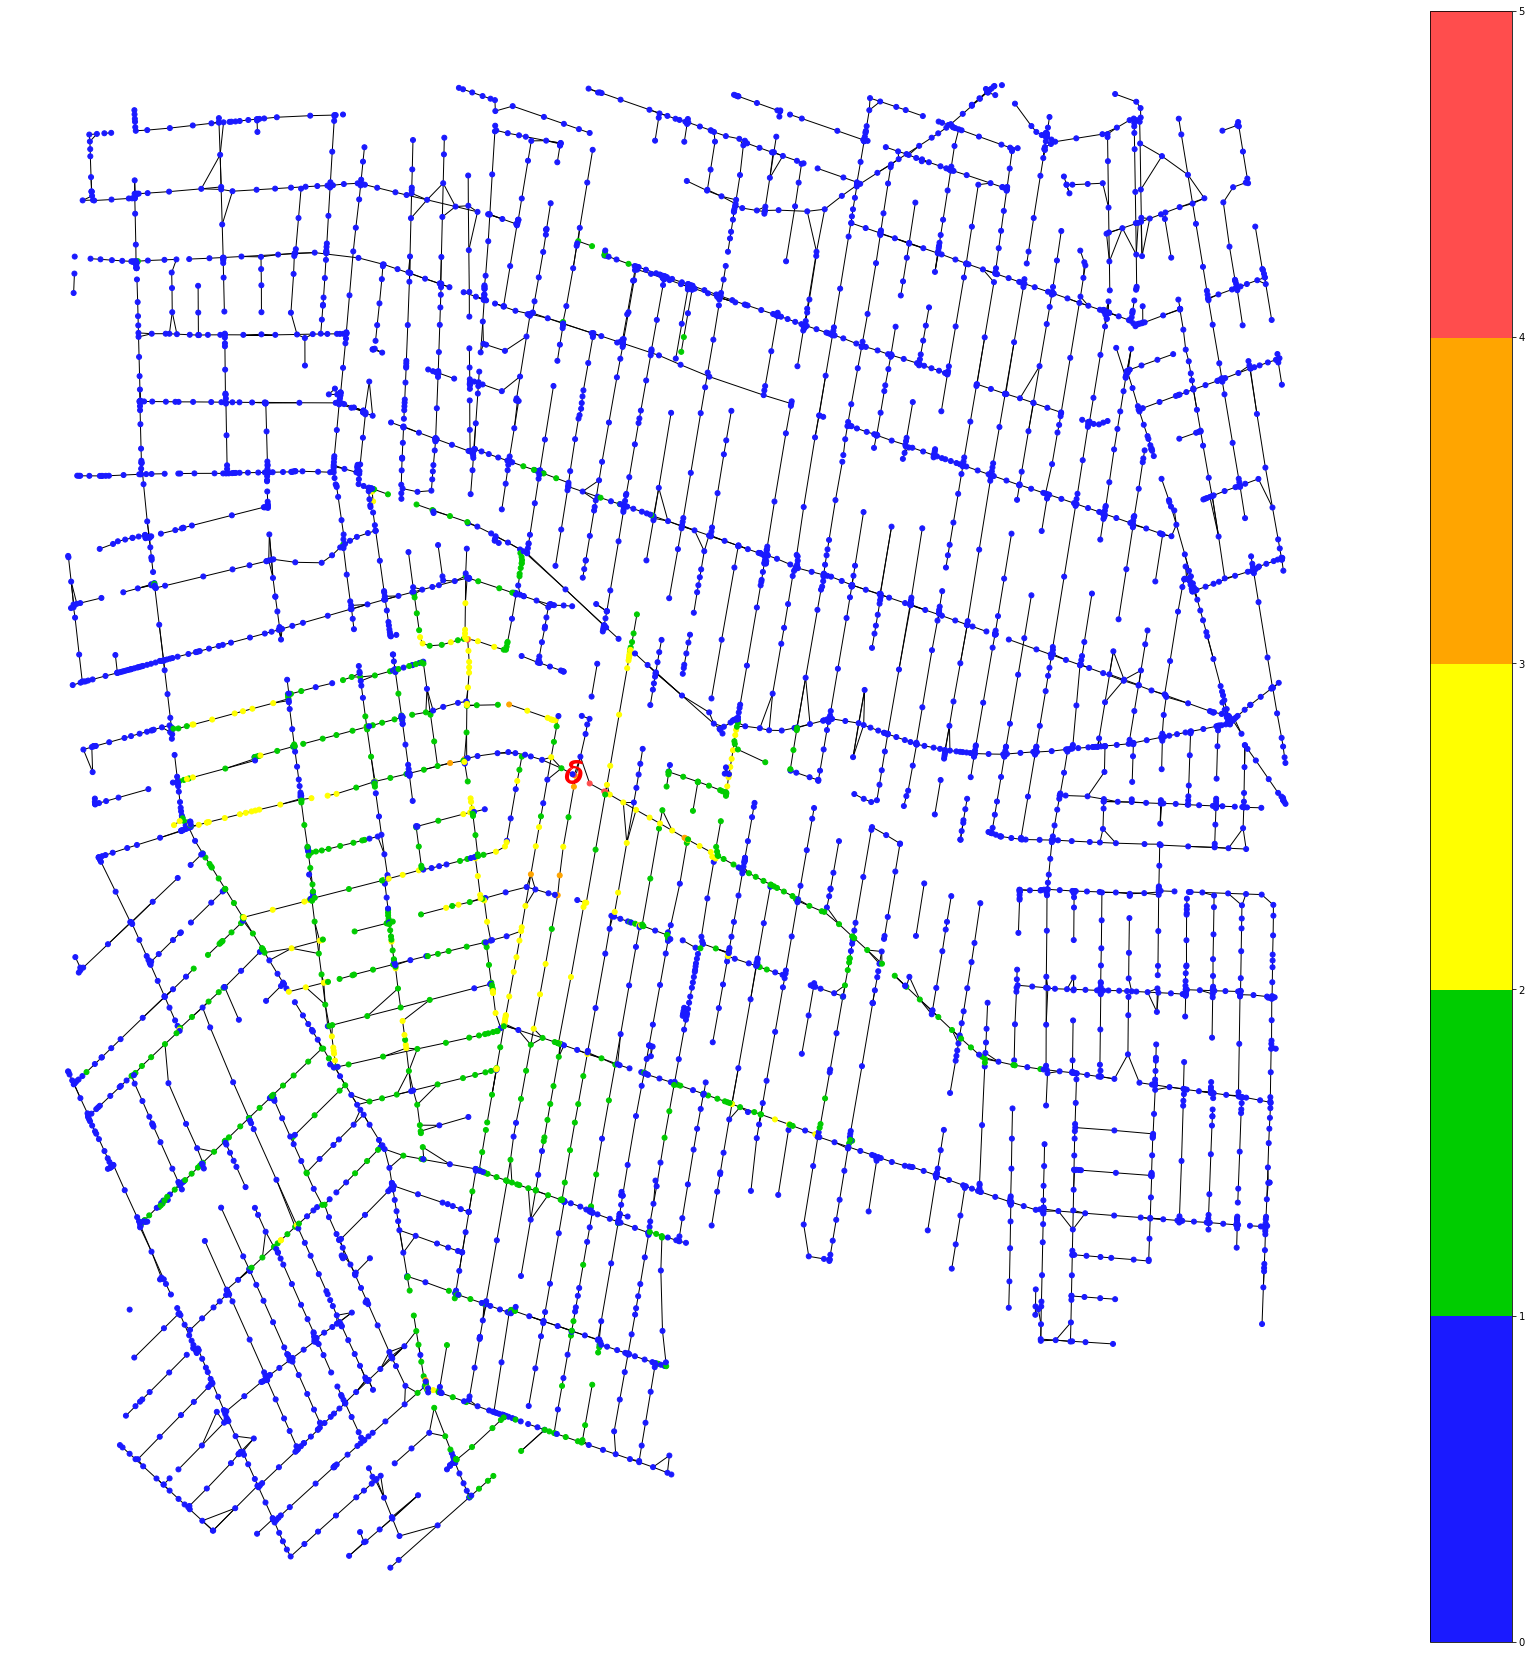

In [59]:
d2plotname = dirpltpath+"/"+name32_11+"_2D_velo_deviation.png"
print(d2plotname)
draw_2d_flow_color(color_indexed0_41,d2plotname)

In [54]:
d2plotname = dirpltpath+"/"+name32_31+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_31,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_2D_velo_deviation.png


In [55]:
d2plotname = dirpltpath+"/"+name32_21+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_21,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_2D_velo_deviation.png


In [56]:
d2plotname = dirpltpath+"/"+name32_41+"_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed0_41,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_2D_velo_deviation.png


In [57]:
d2plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png"
print(d2plotname)
#draw_2d_flow_color(color_indexed32_1,d2plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_2D_velo_deviation.png


In [23]:
v_actual = "/Users/aya/Documents/NYU/ConEdison Leak Detection/Kavya/08142020/v_annsvm_actuallabels.csv"

v_svm = "/Users/aya/Documents/NYU/ConEdison Leak Detection/Kavya/08142020/v_svm_predictedlabels.csv"
v_ann = "/Users/aya/Documents/NYU/ConEdison Leak Detection/Kavya/08142020/v_ann_predictedlabels.csv"

vA_labels=pd.read_csv(v_actual)

vPsvm_labels=pd.read_csv(v_svm)
vPann_labels=pd.read_csv(v_ann)




In [24]:
def df_threader(template, labelfile):
    template_copydf = template.copy()
    threaded_df = template_copydf.merge(labelfile, how = 'outer', on = ['NAME'])    
    threaded_df['colornan'] = threaded_df['color']
    threaded_df['NodeZCoordinate'] = threaded_df['color'].fillna(0)
    threaded_df['color'] = threaded_df['color'].fillna(5)
    threaded_df.drop(labels = ['colornan'], axis = 1, inplace = True)
    threaded_df['color'] = np.int64(threaded_df["color"])
    threaded_df['NodeZCoordinate'] = np.int64(threaded_df["NodeZCoordinate"])

    return threaded_df

In [25]:
Vsvm_labels = df_threader(nFile0, vPsvm_labels)
calculations(Vsvm_labels)

In [26]:
Vann_labels = df_threader(nFile0, vPann_labels)
calculations(Vann_labels)

In [27]:
Vactual_labels = df_threader(nFile0, vA_labels)
calculations(Vactual_labels)

/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D/200nodes_3D_Velocity_SVM.png
Current size: [30, 30]


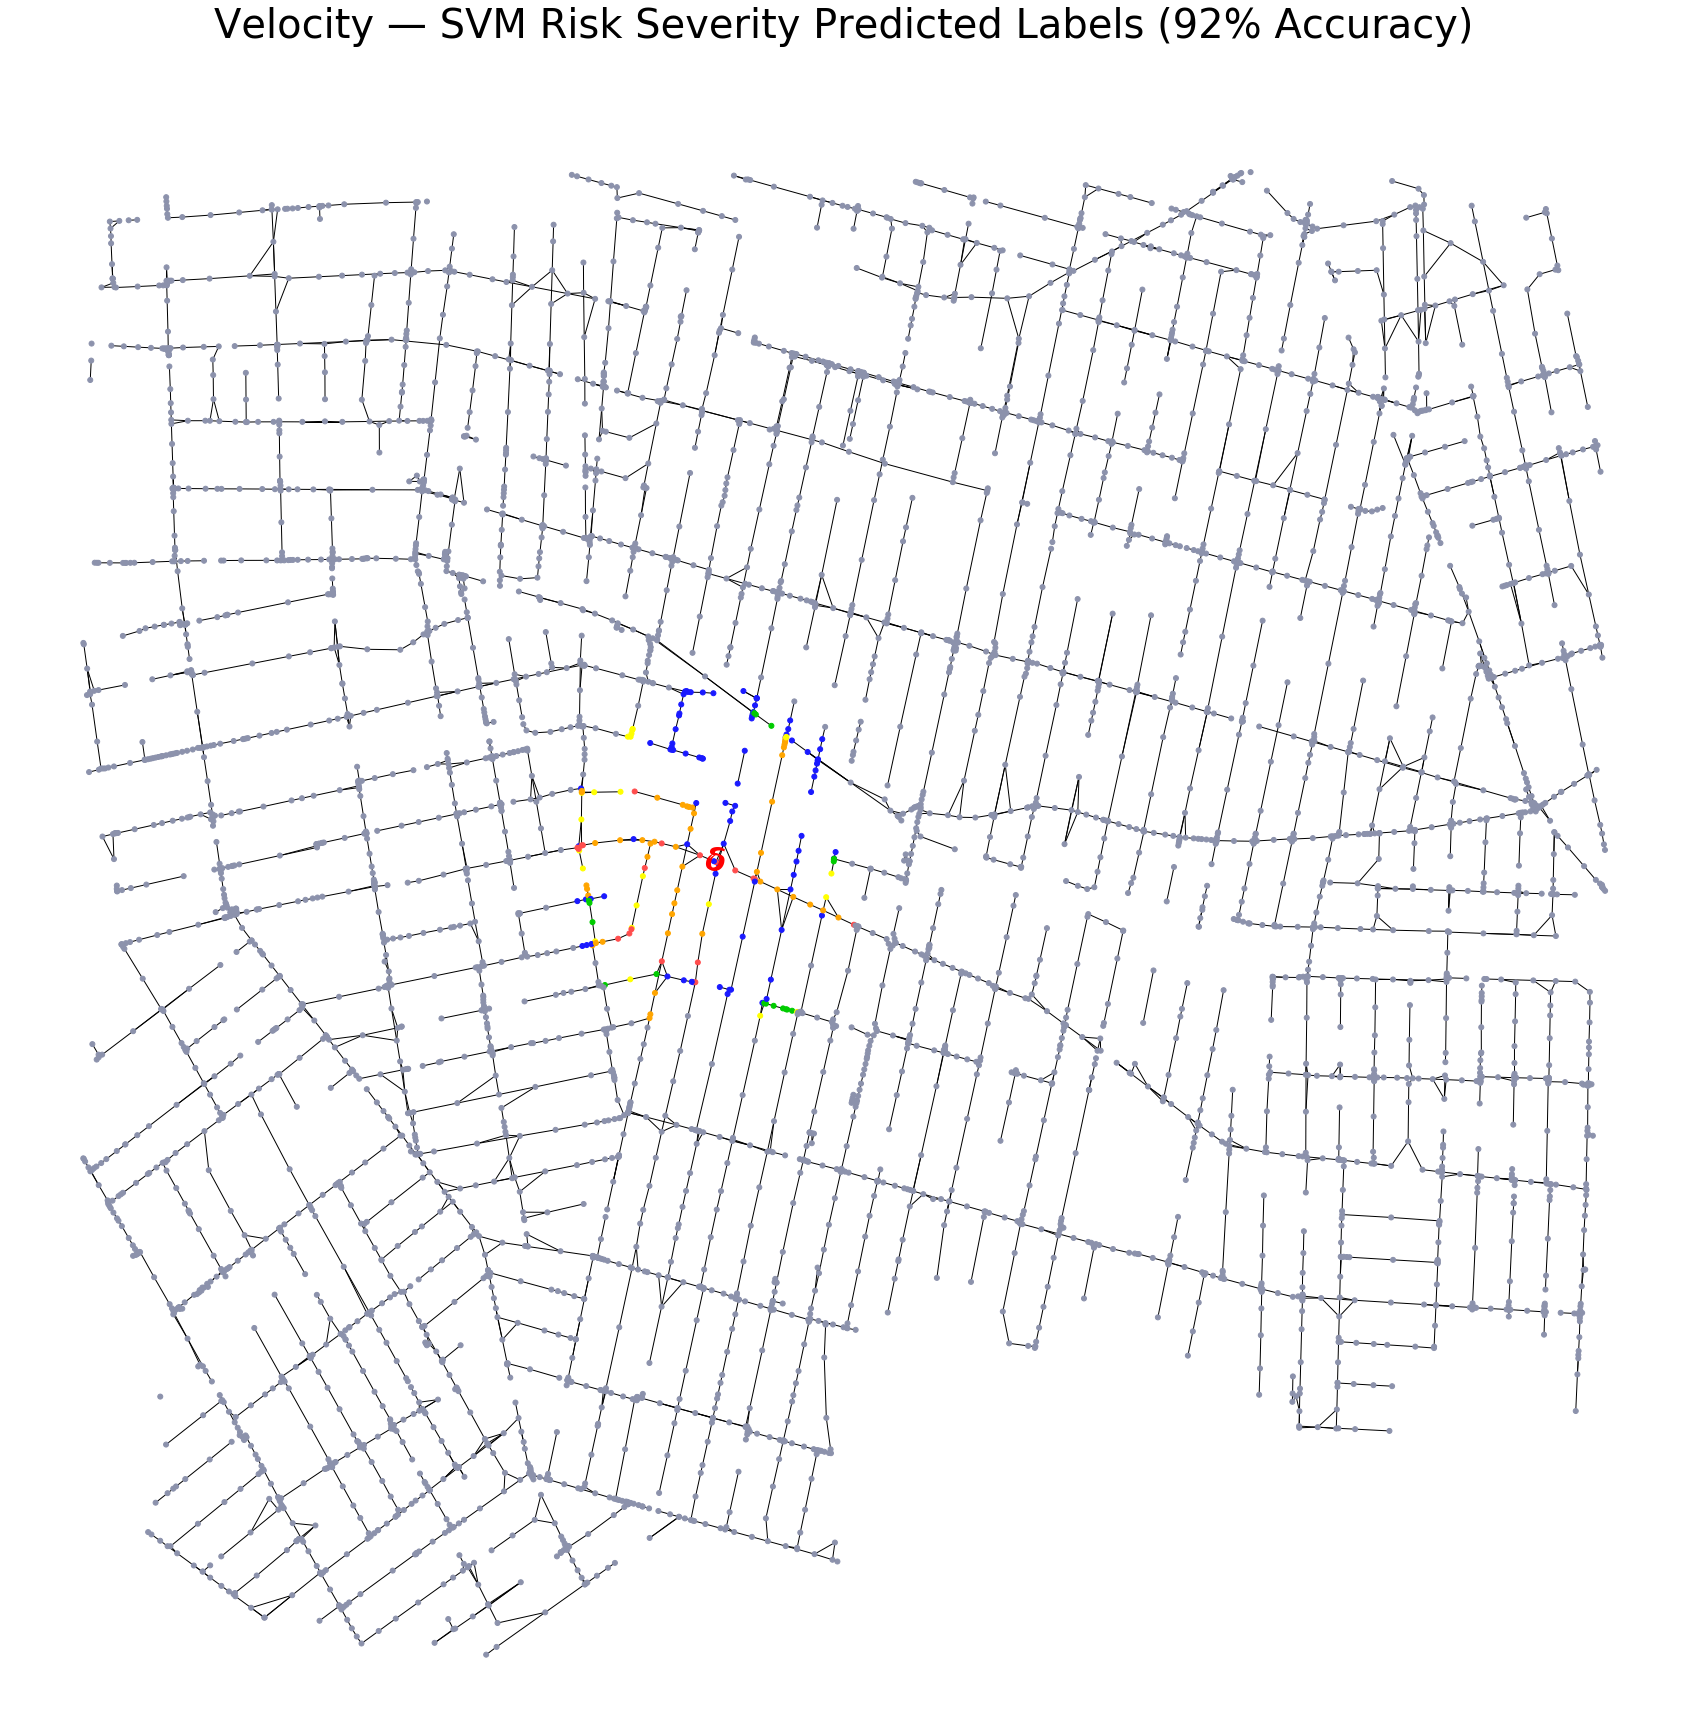

In [72]:
dirpltpath = "/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_SVM.png"
graphtitle = "Velocity — SVM Risk Severity Predicted Labels (92% Accuracy)"

print(d2plotname)

draw_2d_flow_5color(Vsvm_labels,d2plotname,graphtitle)

/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D/200nodes_3D_Velocity_actuallabels.png
Current size: [30, 30]


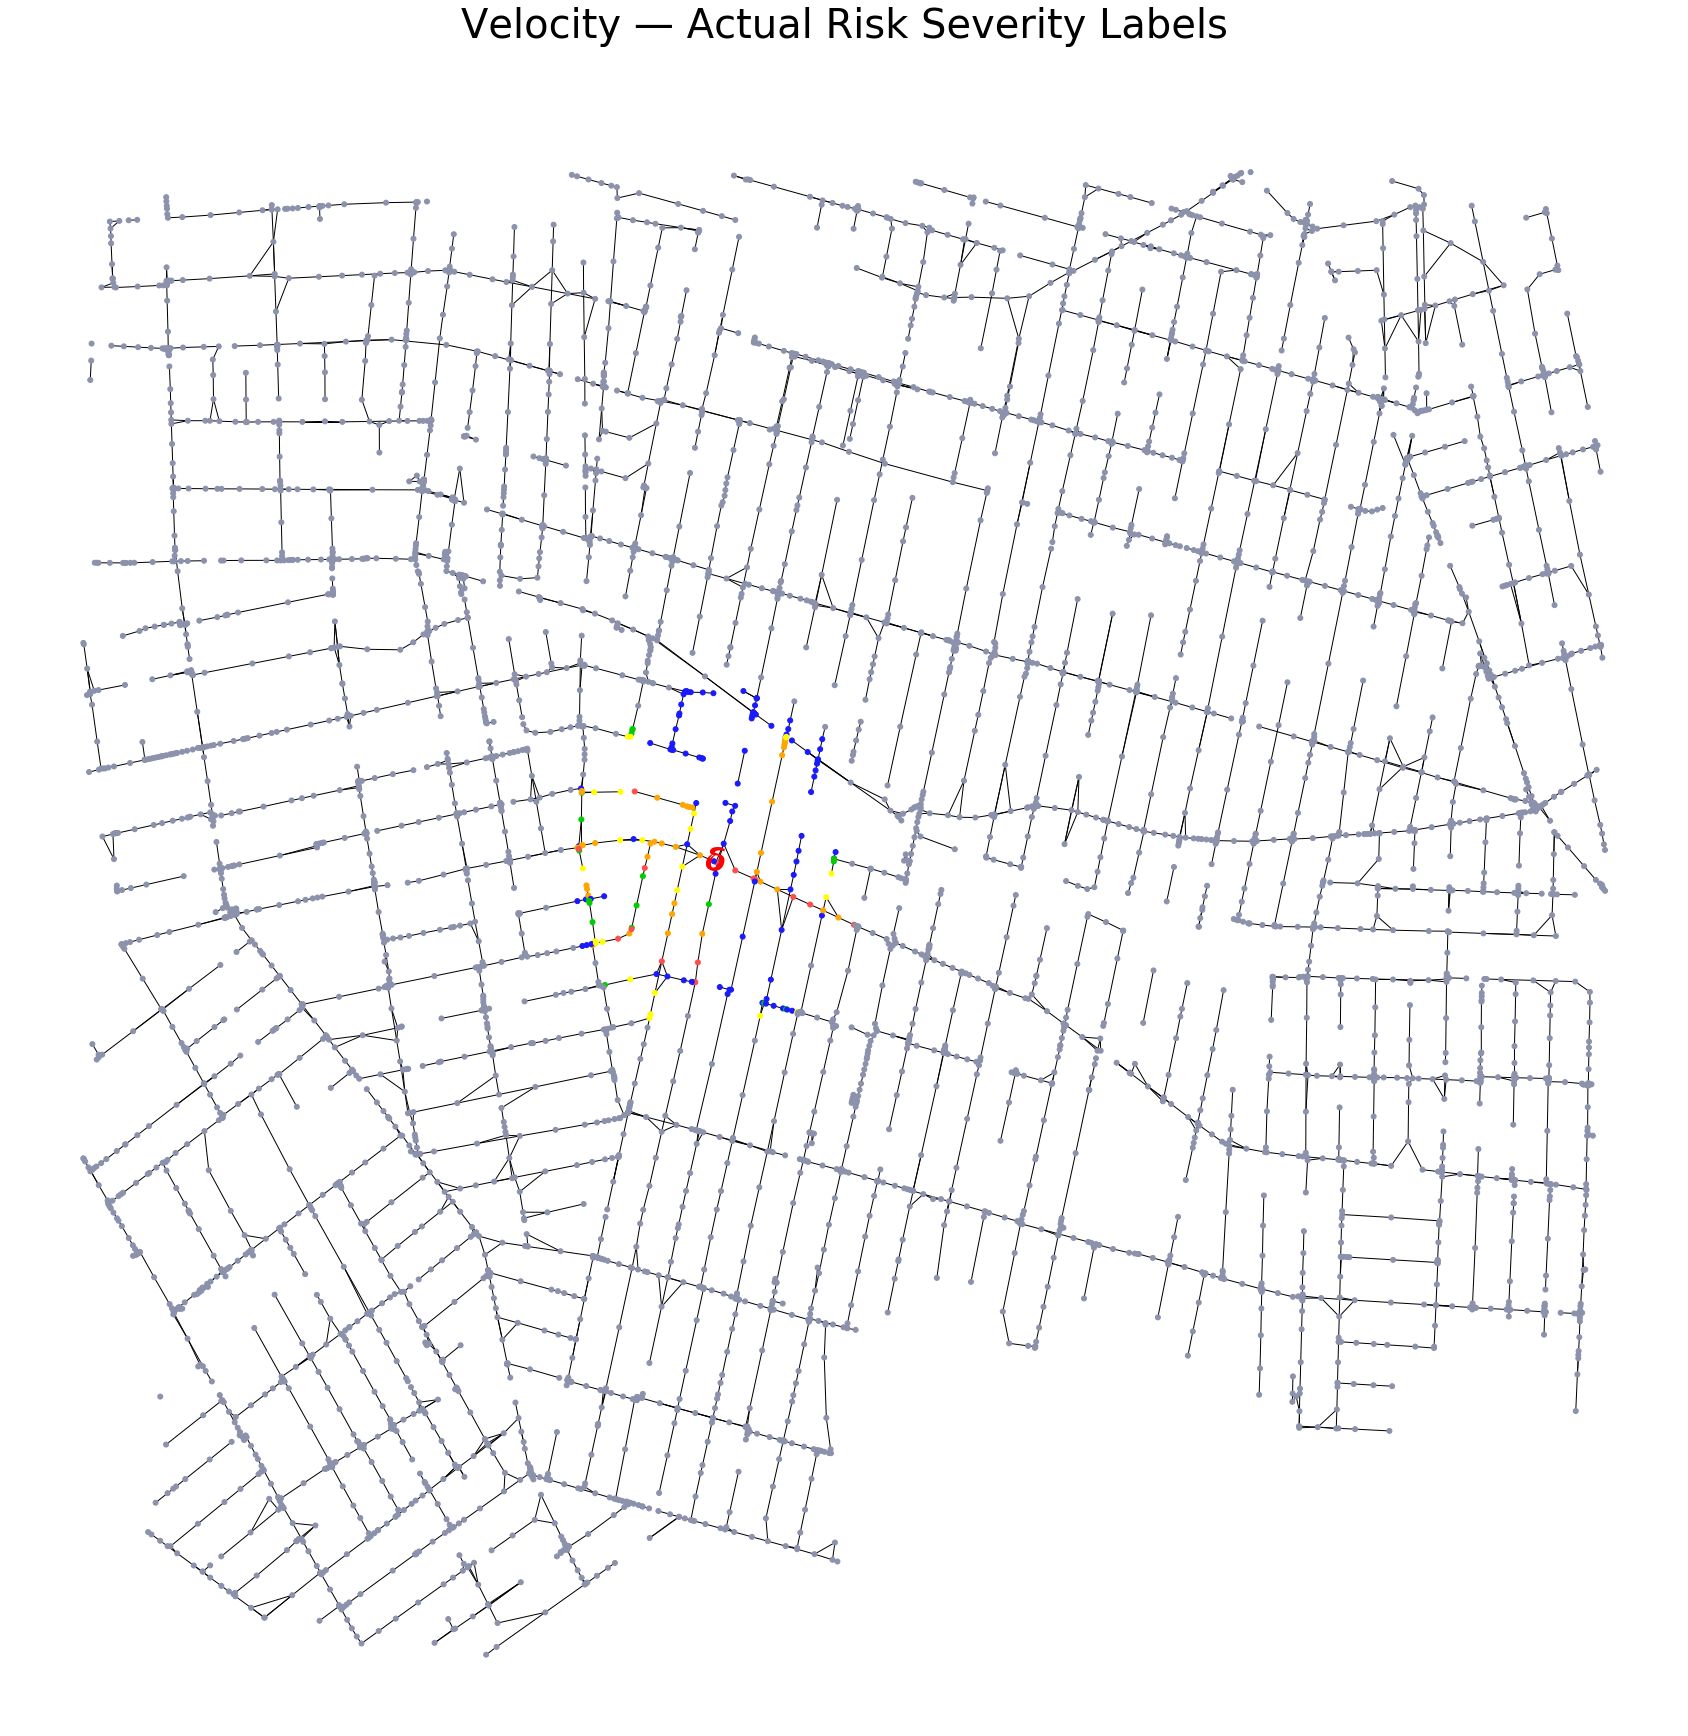

In [73]:
dirpltpath = "/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_actuallabels.png"
graphtitle = "Velocity — Actual Risk Severity Labels"

print(d2plotname)

draw_2d_flow_5color(Vactual_labels,d2plotname,graphtitle)

/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D/200nodes_3D_Velocity_ANN.png
Current size: [30, 30]


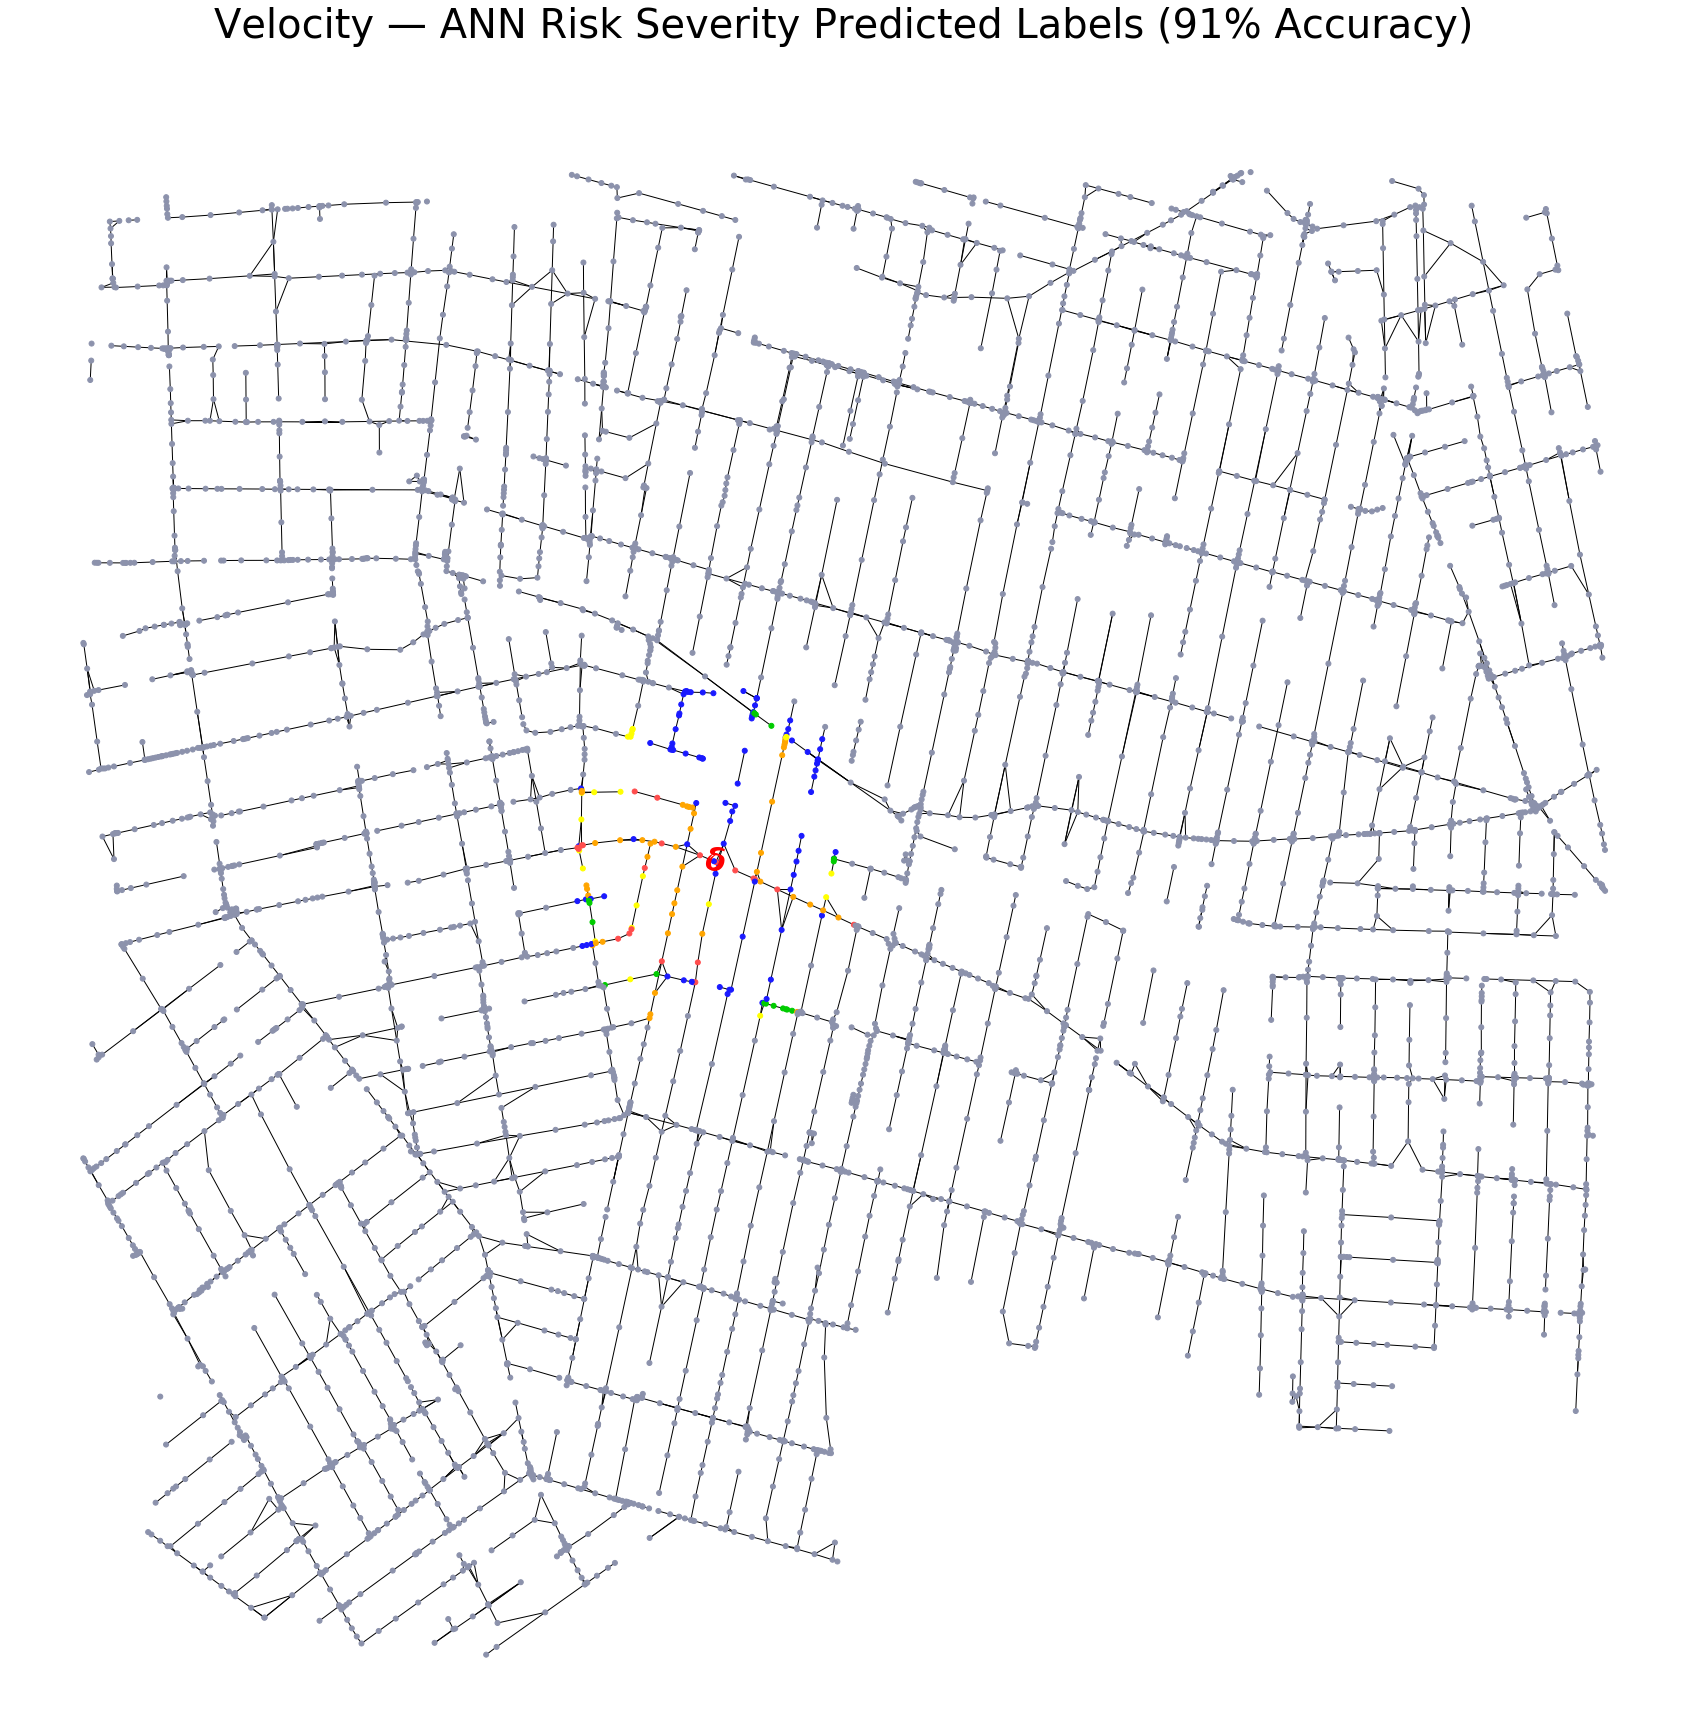

In [75]:
dirpltpath = "/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/2D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_ANN.png"
graphtitle = "Velocity — ANN Risk Severity Predicted Labels (91% Accuracy)"

print(d2plotname)

draw_2d_flow_5color(Vann_labels,d2plotname,graphtitle)

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3D_5colors(inputdf, plotname, titleinput):

    unique_node=inputdf.FacilityToNodeName.unique()
    u_n_2 = inputdf.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr_new = nodeArr[nodeArr.NAME.isin(unique_node)]

    inputdf['mid_point_names']="mid_point"+inputdf.NAME
    
    temp_arr = np.array([inputdf.NAME, inputdf.FacilityFromNodeName, inputdf.FacilityToNodeName, inputdf.mid_point_names, inputdf.mid_point_x, inputdf.mid_point_y, [0]*inputdf.NAME.size,[0]*inputdf.NAME.size,[0]*inputdf.NAME.size])
    edges=np.array([['','']])
    m=0

    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    midpos_xyz_dict = defaultdict(list)
    for i, j, k, l in zip(inputdf.mid_point_names,inputdf.mid_point_x,inputdf.mid_point_y,inputdf.NodeZCoordinate):
        midpos_xyz_dict[i].append(j)
        midpos_xyz_dict[i].append(k)
        midpos_xyz_dict[i].append(l)
    midpos_xyz_dict0=dict(midpos_xyz_dict)

    node_pos_dict = defaultdict(list)
    for i,j,k,l in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate,inputdf.NodeZCoordinate):
        node_pos_dict[i].append(j)
        node_pos_dict[i].append(k)
        node_pos_dict[i].append(l)
    node_pos_dict0 = dict(node_pos_dict)

    temp_0=[0]*inputdf.NAME.size

    node_color_dict = {val:item for val, item in zip(nodeArr.NAME,inputdf.color,)}
    midpoint_color_dict0 = {val:item for val, item in zip(inputdf.mid_point_names, inputdf.color)}

    midpoint_xyzcolor_dict = defaultdict(list)
    for d in (midpos_xyz_dict0, midpoint_color_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpoint_xyzcolor_dict[key].append(value)
    midpoint_xyzcolor_dict0 = dict(midpoint_xyzcolor_dict)

    node_xycolor_dict = defaultdict(list)
    for d in (node_pos_dict0, node_color_dict): # you can list as many input dicts as you want here
        for key, value in d.items():
            node_xycolor_dict[key].append(value)
    node_xycolor_dict0 = dict(node_xycolor_dict)
    
    def network_3D_plot(save=True):
        
        lower = 0
        upper = 4

        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d", "#8c92ac"]

        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Risk Severity', fontsize=30)
            ax.set_title(plotname, fontsize=40, pad = 60)
            ax.set_zlim(lower,upper)

            ctr=0
            for key, value in midpoint_xyzcolor_dict.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[0][2]
                ci = value[1]

                p = ax.scatter(xi, yi, zi, c=colors[ci], alpha=0.7, s=80,cmap=colors)
                ctr=ctr+1

            node_xycolor_dict0.update(midpoint_xyzcolor_dict)


            for i in edges:
                x = np.array((node_xycolor_dict0[i[0]][0][0],node_xycolor_dict0[i[1]][0][0]))
                y = np.array((node_xycolor_dict0[i[0]][0][1], node_xycolor_dict0[i[1]][0][1]))
                z = np.array((node_xycolor_dict0[i[0]][0][2], node_xycolor_dict0[i[1]][0][2]))

                ax.plot(x, y, z, c='gray',alpha=0.5)


        # Set the initial view
        angleVerticle = 30
        angle = 60
        ax.view_init(angleVerticle, angle)
        ax.set_zticks(np.arange(lower,upper+0.5,1))
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20

        if save is not False:
            plt.savefig(d2plotname)
            plt.show()
        else:
            plt.show()
        
        return
    
    network_3D_plot()


In [31]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item in listOfItems:
        if item[1][1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

/Users/aya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


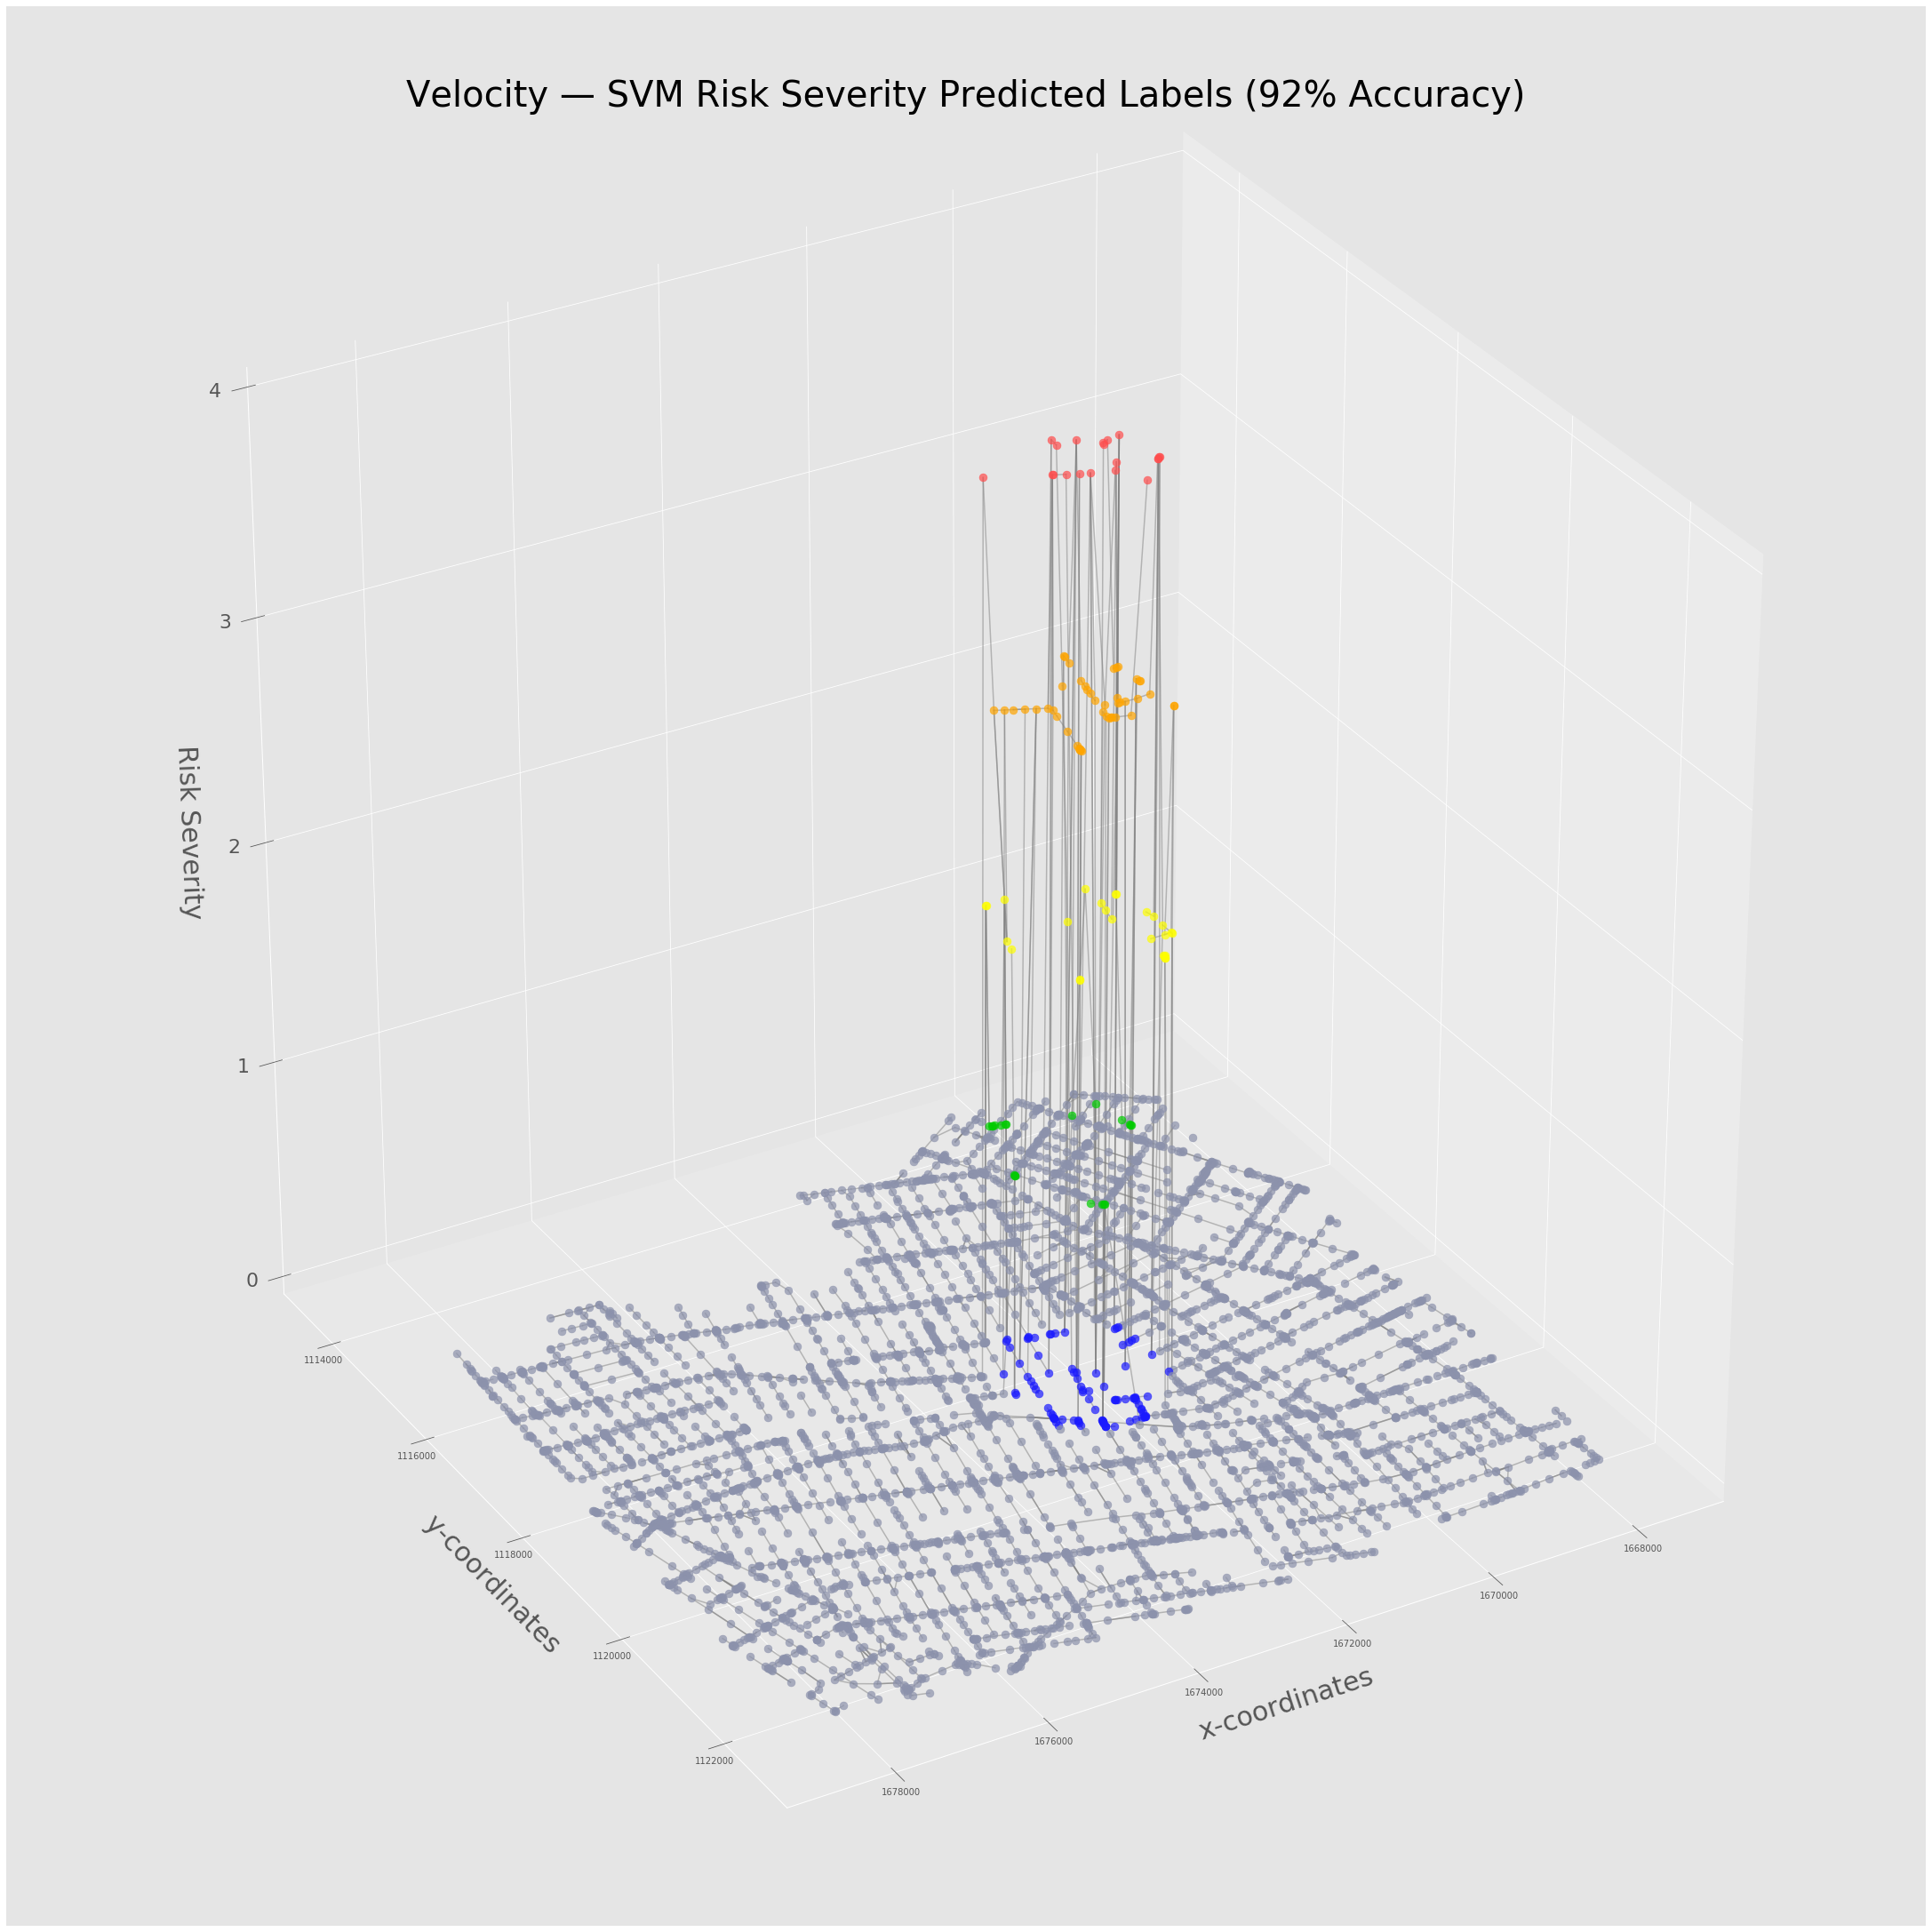

In [43]:
dirpltpath="/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/3D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_SVM_edit1.png"
graphtitle = "Velocity — SVM Risk Severity Predicted Labels (92% Accuracy)"

draw_3D_5colors(Vsvm_labels, graphtitle, d2plotname)

/Users/aya/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


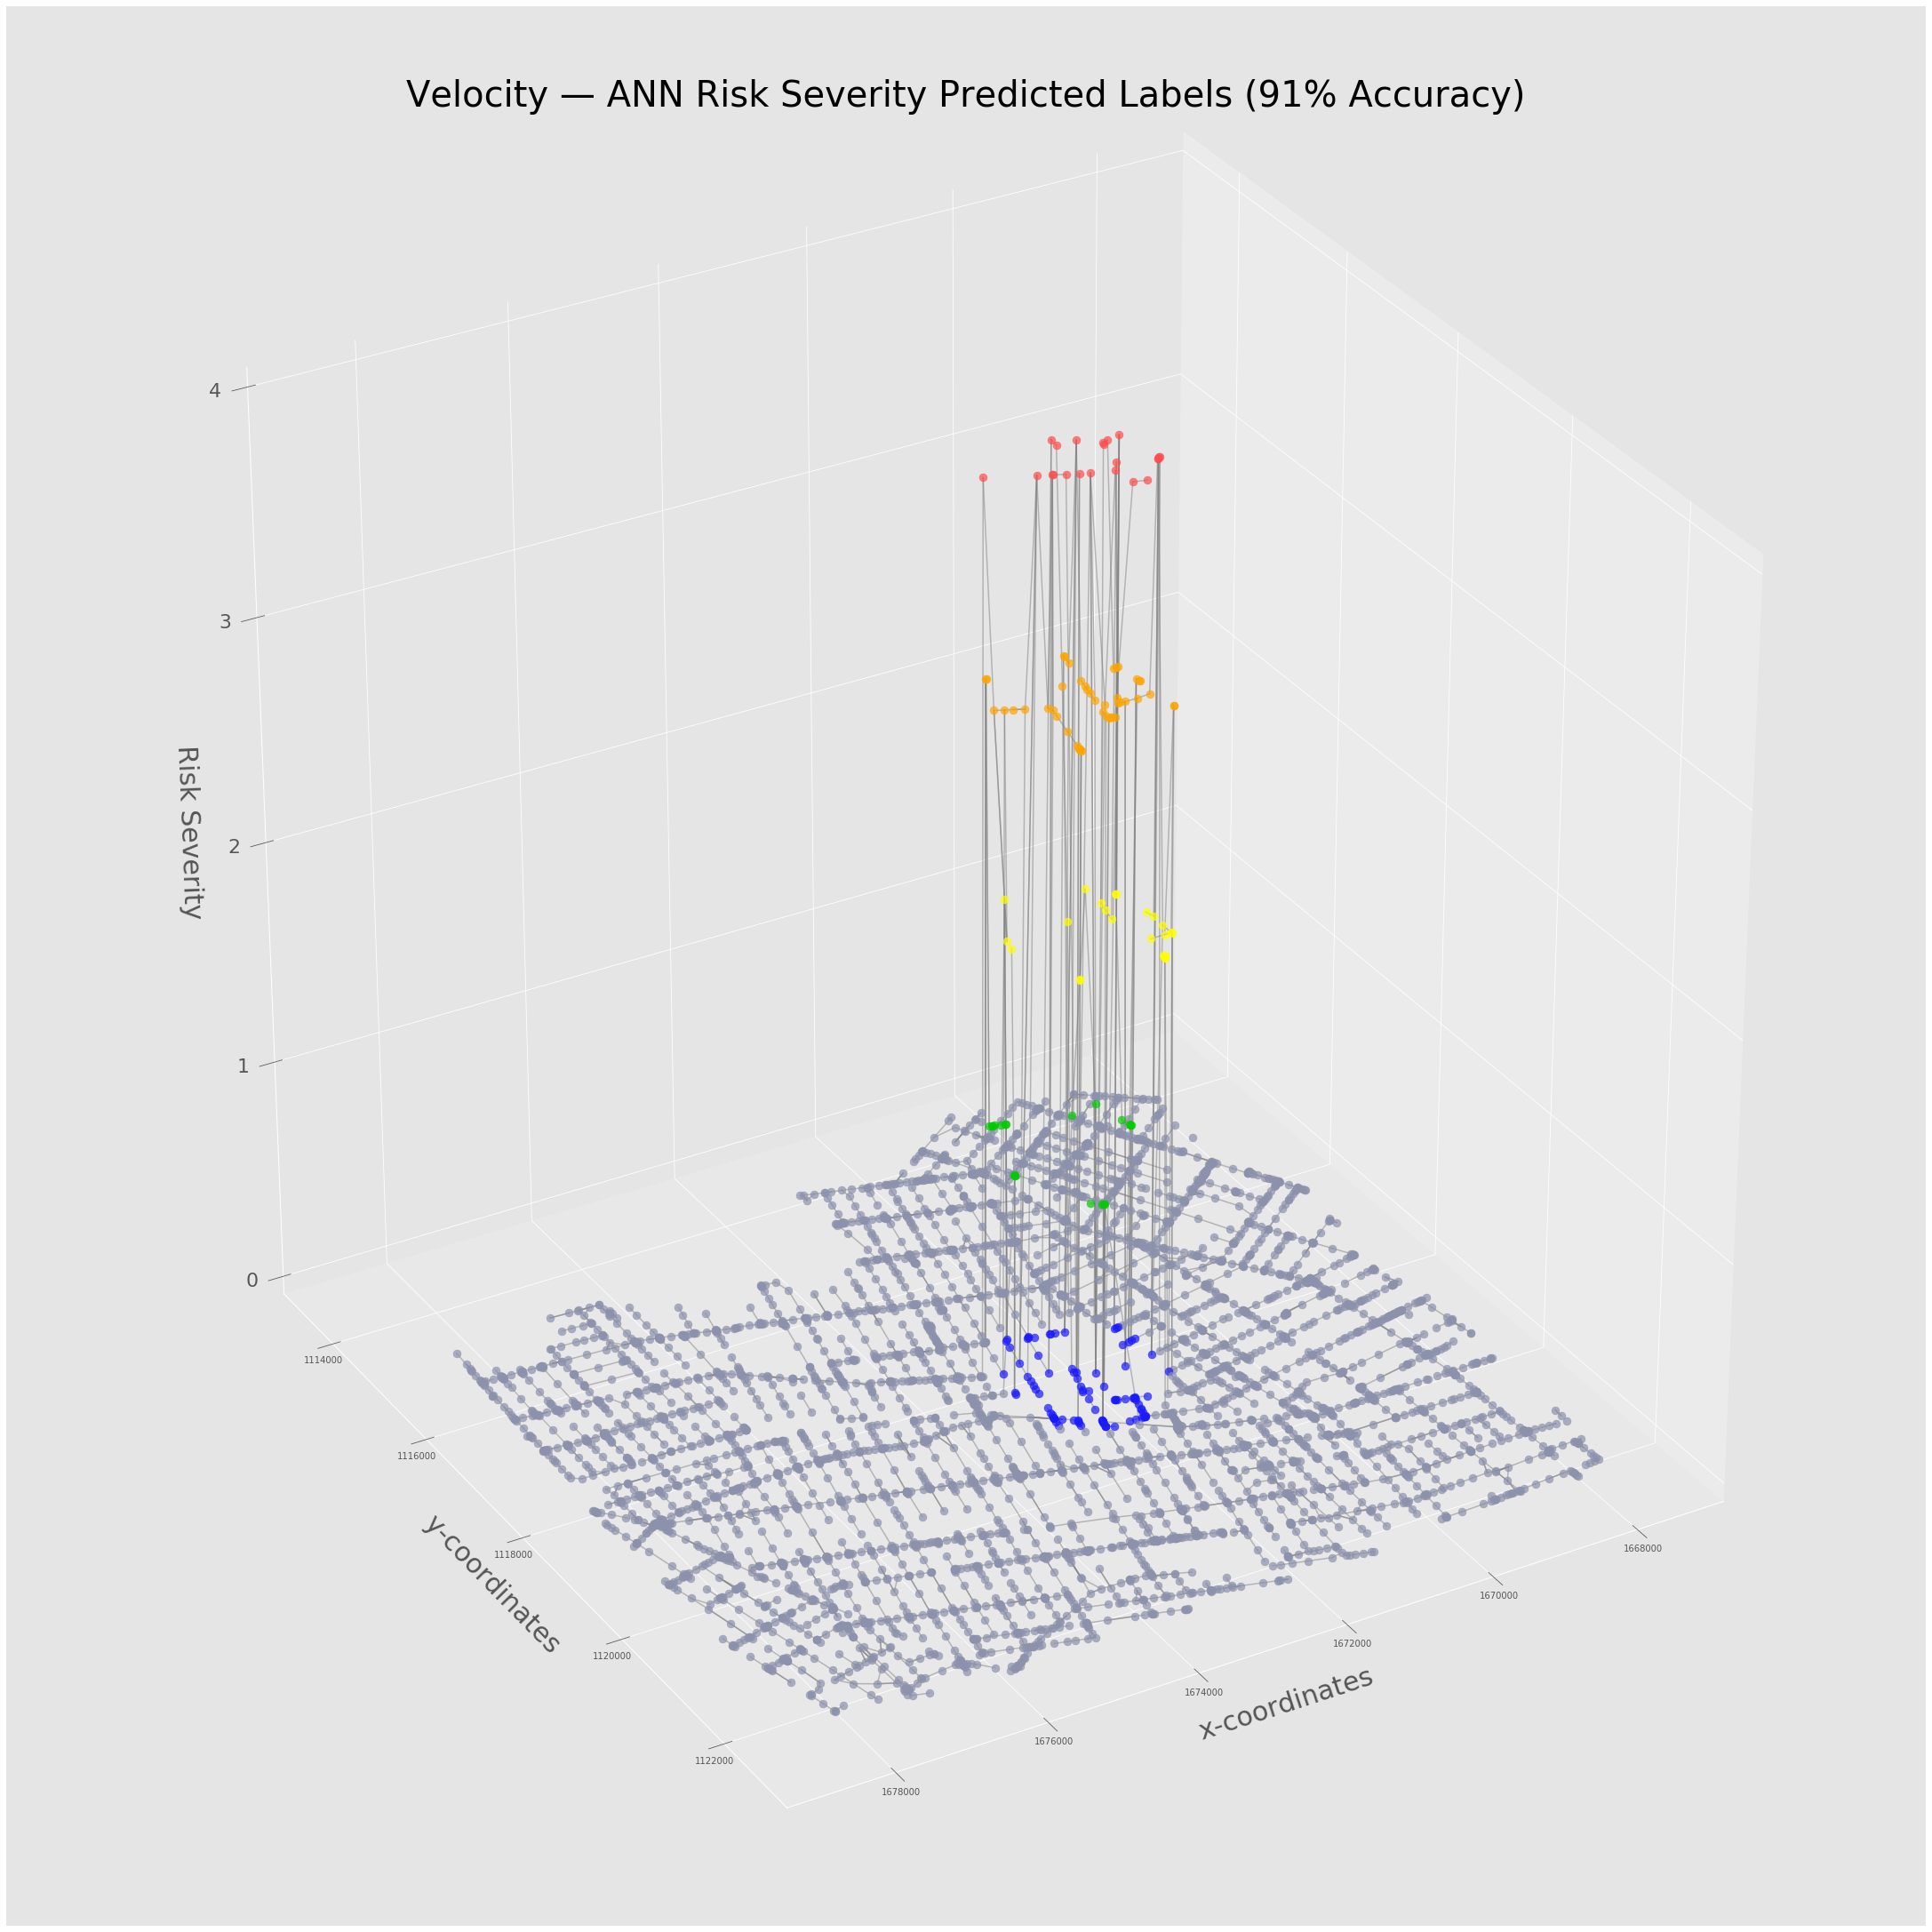

In [48]:
dirpltpath="/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/3D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_ANN_edit2.png"
graphtitle = "Velocity — ANN Risk Severity Predicted Labels (91% Accuracy)"

draw_3D_5colors(Vann_labels, graphtitle, d2plotname)

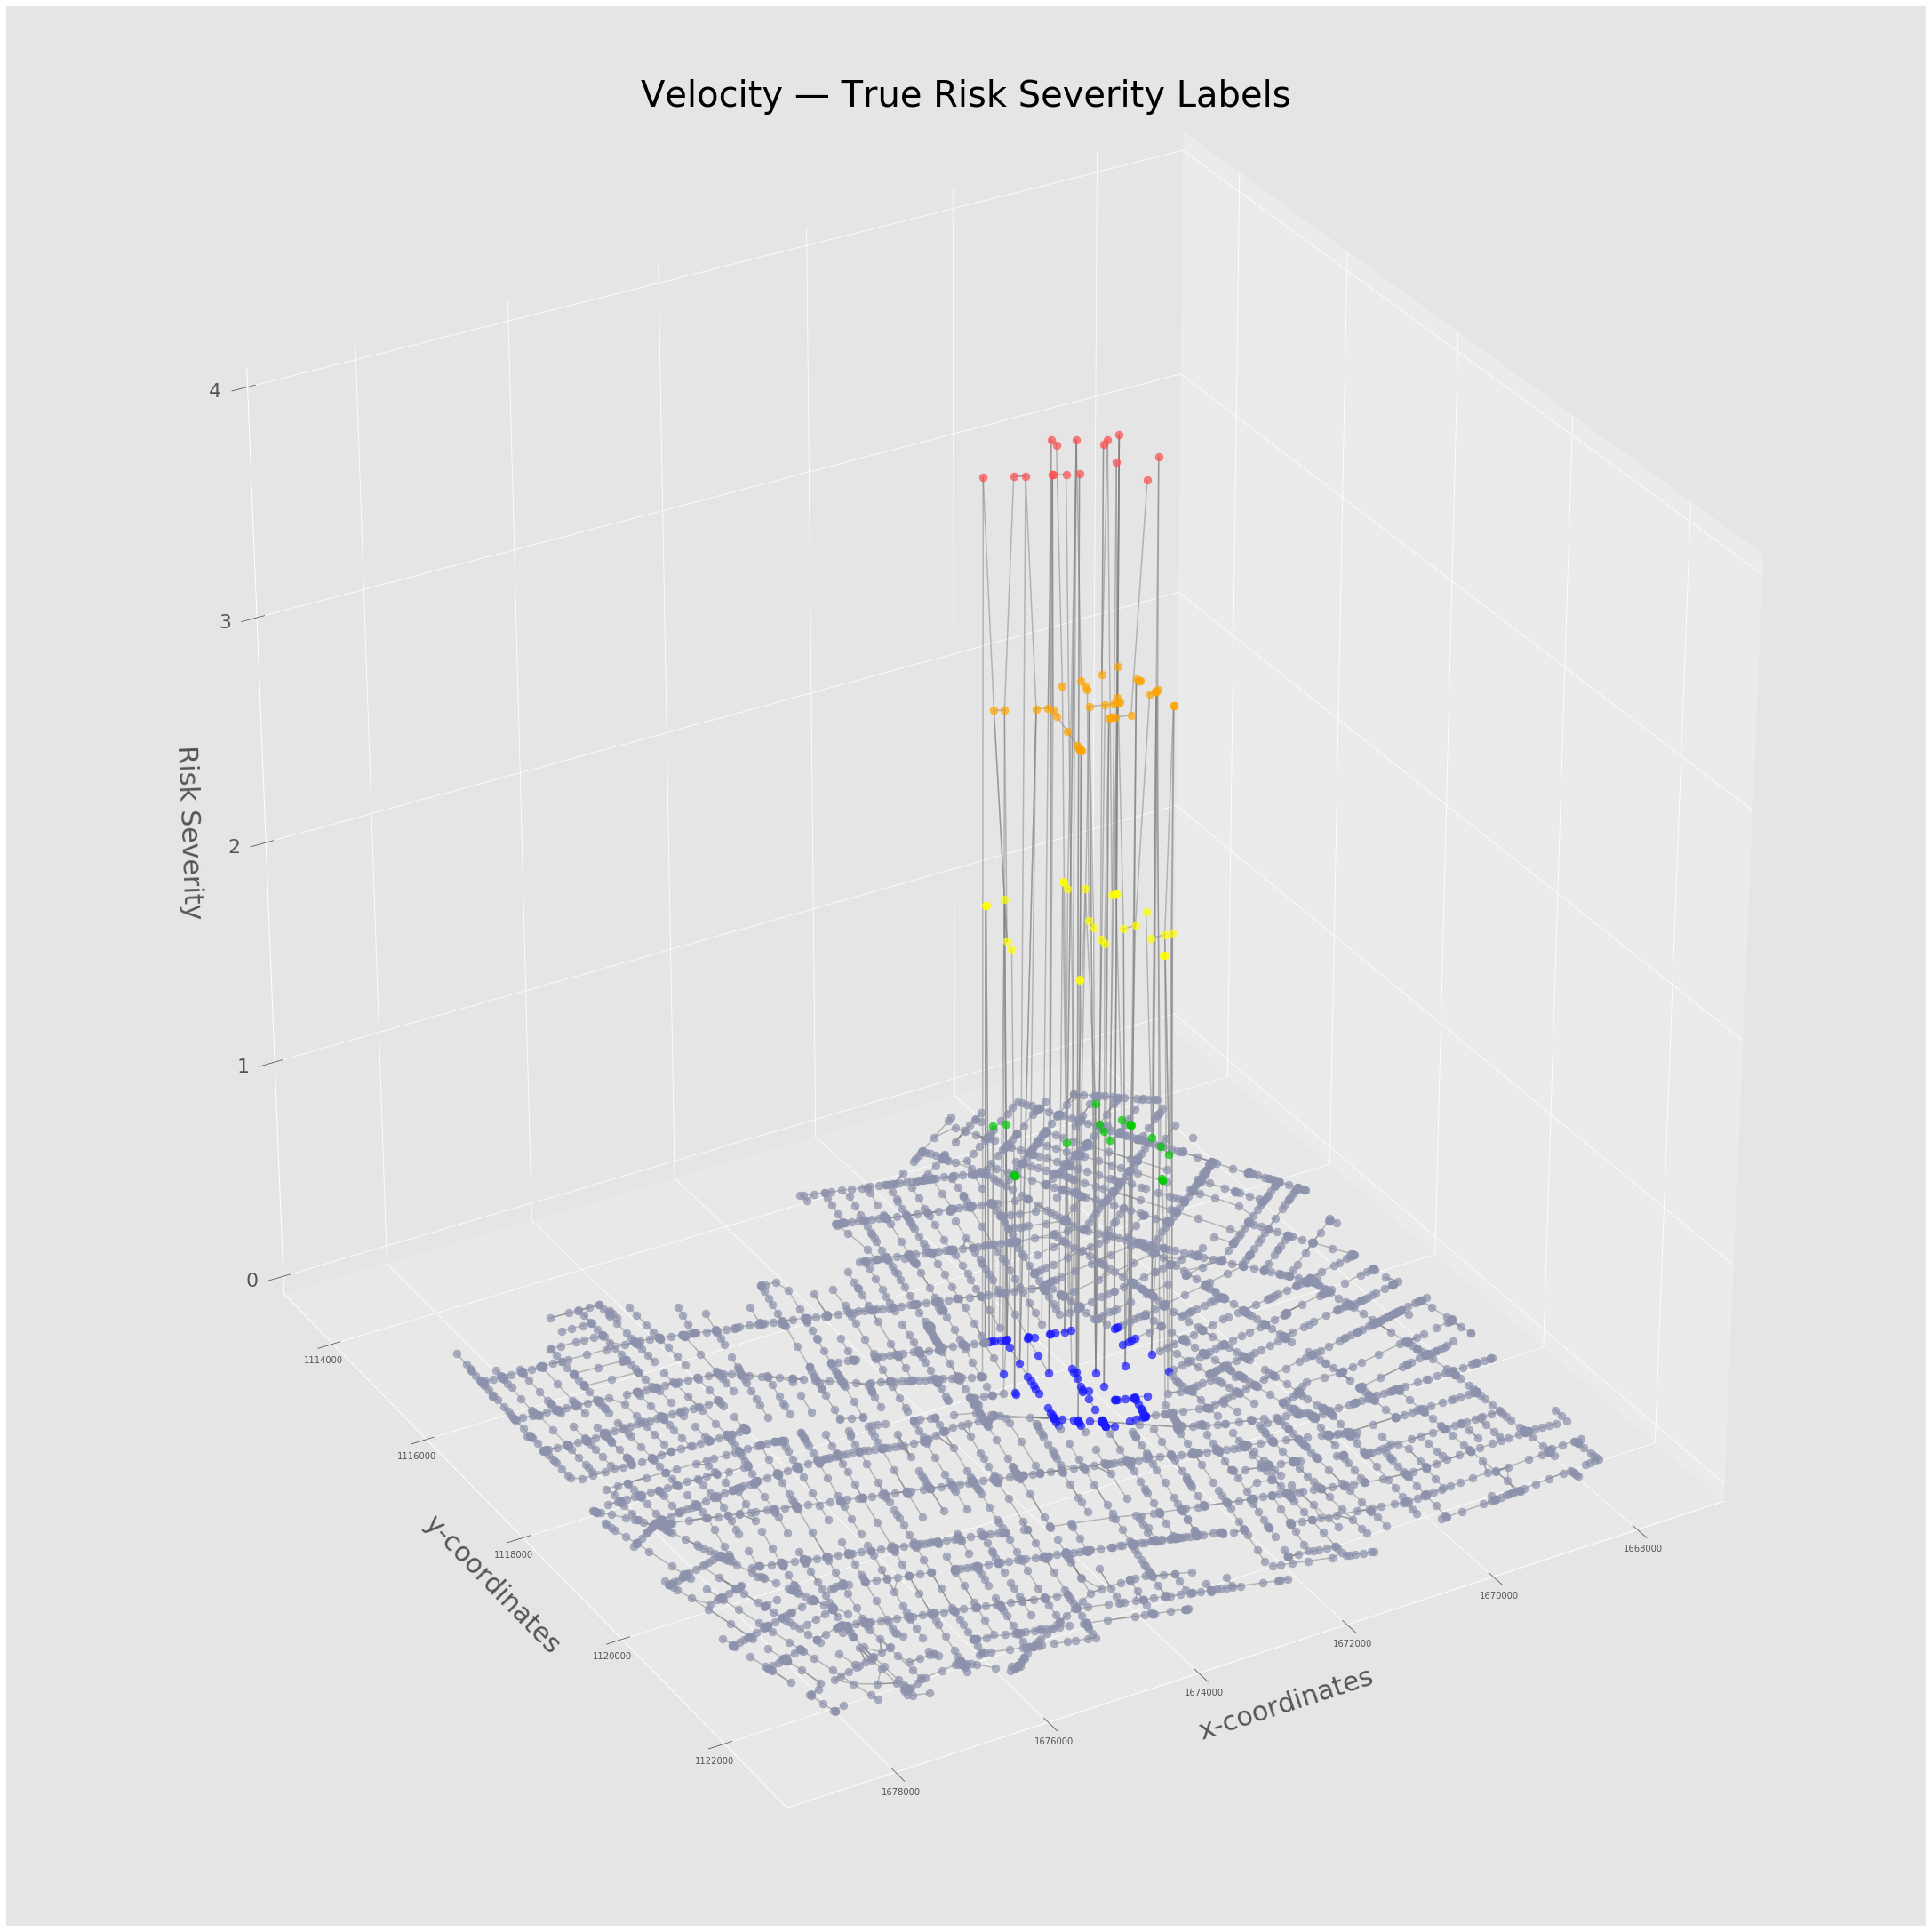

In [28]:
dirpltpath="/Users/aya/Documents/NYU/ConEdison Leak Detection/graphs/SVM results/3D"
d2plotname = dirpltpath+"/"+"200nodes_3D_Velocity_actuallabels_final.png"
graphtitle = "Velocity — True Risk Severity Labels"

draw_3D_5colors(Vactual_labels, graphtitle, d2plotname)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

def draw_3d_color(graphArr,d3plotname):
    cntrlnd = '0BEC50B8'
    unique_node=graphArr.FacilityToNodeName.unique()
    u_n_2 = graphArr.FacilityFromNodeName.unique()
    unique_node=np.append(unique_node,u_n_2)
    unique_node=np.unique(unique_node)
    anomalyFreeNode = toplevelpath + all_datadir + "/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
    nodeArr=pd.read_csv(anomalyFreeNode)
    nodeArr = nodeArr[nodeArr.NAME.isin(unique_node)]

    G = nx.Graph()

    graphArr['mid_point_names']="mid_point"+graphArr.NAME



    temp_arr = np.array([graphArr.NAME, graphArr.FacilityFromNodeName, graphArr.FacilityToNodeName, graphArr.mid_point_names, graphArr.mid_point_x, graphArr.mid_point_y, [0]*graphArr.NAME.size,[0]*graphArr.NAME.size,[0]*graphArr.NAME.size])
    edges=np.array([['','']])
    m=0
    for i,j in enumerate(temp_arr[3]):
        tmp_src=temp_arr[1][i]
        tmp_dest=temp_arr[2][i]
        srcs = np.where(temp_arr[1]==tmp_src)
        dests = np.where(temp_arr[2] == tmp_src)
        for r in srcs[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][r]
            edges = np.vstack([edges, [src_node,dest_node]])
        for k in dests[0]:
            src_node=temp_arr[3][i]
            dest_node=temp_arr[3][k]
            edges = np.vstack([edges, [src_node,dest_node]])
    edges=np.delete(edges,(0), axis=0)

    pos_dict = defaultdict(list)
    mid_pos_dict = defaultdict(list)
    for i, j, k in zip(graphArr.mid_point_names,graphArr.mid_point_x,graphArr.mid_point_y):
        mid_pos_dict[i].append(j)
        mid_pos_dict[i].append(k)
    
    for i,j,k in zip(nodeArr.NAME,nodeArr.NodeXCoordinate,nodeArr.NodeYCoordinate):
        pos_dict[i].append(j)
        pos_dict[i].append(k)
    pos_dict0 = dict(pos_dict)

    mid_post_dict0=dict(mid_pos_dict)


    temp_0=[0]*graphArr.NAME.size


    node_dict0 = {val:item for val, item in zip(nodeArr.NAME,graphArr.color)}
    edgeflow_dict0 = {val:item for val, item in zip(graphArr.mid_point_names, graphArr.color)}

    d3pos_dict = defaultdict(list)
    midpos_dict = defaultdict(list)

    for d in (mid_post_dict0, edgeflow_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            midpos_dict[key].append(value)
    midpos_dict0 = dict(midpos_dict)

    for d in (pos_dict0, node_dict0): # you can list as many input dicts as you want here
        for key, value in d.items():
            d3pos_dict[key].append(value)
    d3pos_dict0 = dict(d3pos_dict)


    edge_list = list(graphArr.mid_point_names)
    node_list = list(nodeArr.NAME)
    temp = list(pos_dict0.keys())
    temp2 = list(mid_post_dict0.keys())
    keys_all=np.append(temp,temp2)

    G.add_nodes_from(keys_all)

    for n in node_list:
        G.nodes[n]['pos'] = pos_dict0[n]
        G.nodes[n]['flow'] = 0
    
    for n in edge_list:
        G.nodes[n]['pos'] = mid_post_dict0[n]
        G.nodes[n]['flow'] = edgeflow_dict0[n]
    

    for i in edges:
        pdest = i[1]
        psource = i[0]
        name = i[0]
        G.add_edge(psource, pdest, n = name)


    def network_plot_3D(G, angle, save=True):
    
        lower = 0
        upper = 5
        #tp_arr = (graphArr['VELOpipeFPS']-lower)/(upper-lower)
        #tp2 = [float(i) for i in tp_arr]
        
        colors = ["#1a1aff", "#00cc00", "#ffff00", "#ffa500", "#ff4d4d"]
        #cmap= matplotlib.colors.ListedColormap(colors)
        #cmap.set_under("crimson")
        #cmap.set_over("w")
        #norm= matplotlib.colors.Normalize(vmin=lower,vmax=upper)
        #mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        #cc = cmap(tp2)


        # 3D network plot
        with plt.style.context(('ggplot')):

            fig = plt.figure(figsize=(30,30))
            ax = Axes3D(fig)
            ax.set_xlabel('x-coordinates',fontsize=30)
            ax.set_ylabel('y-coordinates',fontsize=30)
            ax.set_zlabel('Flow Deviation', fontsize=30)
            ax.set_zlim(lower,upper)
            
            ctr=0
            for key, value in midpos_dict0.items():
                xi = value[0][0]
                yi = value[0][1]
                zi = value[1]

                p = ax.scatter(xi, yi, zi, c=colors[zi], alpha=0.7, s=80,cmap=colors)
                ctr=ctr+1
            d3pos_dict0.update(midpos_dict0)

        
            for i in edges:
                x = np.array((d3pos_dict0[i[0]][0][0],d3pos_dict0[i[1]][0][0] ))
                y = np.array((d3pos_dict0[i[0]][0][1], d3pos_dict0[i[1]][0][1]))
                z = np.array((d3pos_dict0[i[0]][1], d3pos_dict0[i[1]][1]))

                ax.plot(x, y, z, c='gray',alpha=0.5)
            #fig.colorbar(p)


        # Set the initial view
        angleVerticle = 30
        ax.view_init(angleVerticle, angle)
        ax.zaxis.set_tick_params(labelsize='22',pad=17)
        ax.zaxis.labelpad = 40
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 20
        

        
        #plt.savefig(d3plotname)
        plt.show()

        return

    network_plot_3D(G, 60)

In [59]:
d3plotname = dirpltpath+"/"+name32_11+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_11,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak11.csv_3D_velo_deviation.png


In [60]:
d3plotname = dirpltpath+"/"+name32_21+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_21,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak21.csv_3D_velo_deviation.png


In [61]:
d3plotname = dirpltpath+"/"+name32_31+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_31,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak31.csv_3D_velo_deviation.png


In [62]:
d3plotname = dirpltpath+"/"+name32_41+"_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_41,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/NYU Anamoly Data_32Deg_Pipes_Leak41.csv_3D_velo_deviation.png


In [63]:
d3plotname = dirpltpath+"/"+"Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png"
print(d3plotname)
#draw_3d_color(color_indexed32_1,d3plotname)

/Users/kavyaub/Documents/mySubjects/ConEdison/screenshots/screenshotsPipe_32Deg/Data_ZeroDeg_Pipes_Leak1_3D_velo_deviation.png


In [64]:
max(res64_41.VELOpipeFPS)

0.3388456203725569

In [65]:
def save_data_file(temp):
    if temp == 16:
        arr1=color_indexed1
        arr11=color_indexed11
        arr21=color_indexed21
        arr31=color_indexed31
        arr41=color_indexed41
    elif temp==0:
        arr1=color_indexed0_1
        arr11=color_indexed0_11
        arr21=color_indexed0_21
        arr31=color_indexed0_31
        arr41=color_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1
        arr11=color_indexed32_11
        arr21=color_indexed32_21
        arr31=color_indexed32_31
        arr41=color_indexed32_41
    elif temp==48:
        arr1=color_indexed48_1
        arr11=color_indexed48_11
        arr21=color_indexed48_21
        arr31=color_indexed48_31
        arr41=color_indexed48_41
    elif temp==64:
        arr1=color_indexed64_1
        arr11=color_indexed64_11
        arr21=color_indexed64_21
        arr31=color_indexed64_31
        arr41=color_indexed64_41
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])

    ff = np.vstack([p,pd,color,day])
    np.savetxt("./data/pipes/full/vel_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')
    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    np.savetxt("./data/pipes/full/target_"+str(temp)+".txt", targets.T,fmt='%s')
    
    return final_file, targets


In [66]:
def save_data_file_500(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=color_indexed0_1_500
        arr11=color_indexed0_11_500
        arr21=color_indexed0_21_500
        arr31=color_indexed0_31_500
        arr41=color_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])

    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])
    #np.savetxt("data_pipes_vel"+str(temp)+".txt", final_file.T,fmt='%s')
    #np.savetxt("data_pipes_vel_ind_"+str(temp)+".txt", final_file[2],fmt='%s')
    #np.savetxt("./data/pipes/data_pipes_vel_500_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    #np.savetxt("target_nodes"+str(temp)+".txt", targets.T,fmt='%s')
    #np.savetxt("./data/pipes/target_pipes_500_lab4_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets



In [67]:
final_file_0_500,target_0_500 = save_data_file_500(0)
#final_file_16_500,target_16_500 = save_data_file_500(16)
#final_file_32_500,target_32_500= save_data_file_500(32)
#final_file_48_500,target_48_500 = save_data_file_500(48)
#final_file_64_500,target_64_500 = save_data_file_500(64)

In [68]:
#Code to transpose input file for ANN
#pd.read_csv("./data/pipes/data_pipes_vel_500_64.csv", header=None).T.to_csv("./data/pipes/data_pipes_vel_500_64.csv", header=False, index=False)
#final_file_0_500[2]

In [69]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm


In [70]:
final_file_0,target_0 = save_data_file(0)
#final_file_16,target_16 = save_data_file(16)
#final_file_32,target_32= save_data_file(32)
#final_file_48,target_48 = save_data_file(48)
#final_file_64,target_64 = save_data_file(64)

label1_values = []
label2_values = []
label3_values = []
label4_values = []

for i in range(0,len(final_file_0_500[4])):
    if final_file_0_500[4][i]==1:
        label1_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==2:
        label2_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==3:
        label3_values.append(final_file_0_500.T[i])
    elif final_file_0_500[4][i]==4:
        label4_values.append(final_file_0_500.T[i])
    else:
        label1_values.append(final_file_0_500.T[i])
        label2_values.append(final_file_0_500.T[i])
        label3_values.append(final_file_0_500.T[i])
        label4_values.append(final_file_0_500.T[i])
label1 = np.vstack(label1_values).T
label2 = np.vstack(label2_values).T
label3 = np.vstack(label3_values).T
label4 = np.vstack(label4_values).T

label2[4][label2[4]==2]=1
label3[4][label3[4]==3]=1
label4[4][label4[4]==4]=1

In [71]:
#consolidated_file = np.concatenate((final_file_0,final_file_16,final_file_32,final_file_48,final_file_64),axis=1)
#consolidated_target = np.concatenate((target_0,target_16,target_32,target_48,target_64))
X=np.array([label1[2],label1[5]])
y=label1[4]

np.savetxt("./data/pipes/vel_0_label1.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label1.csv",y,delimiter=",",fmt='%s')
X=np.array([label2[2],label2[5]])
y=label2[4]

np.savetxt("./data/pipes/vel_0_label2.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label2.csv",y,delimiter=",",fmt='%s')
X=np.array([label3[2],label3[5]])
y=label3[4]
np.savetxt("./data/pipes/vel_0_label3.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label3.csv",y,delimiter=",",fmt='%s')
X=np.array([label4[2],label4[5]])
y=label4[4]
np.savetxt("./data/pipes/vel_0_label4.csv",X.T,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0label4.csv",y,delimiter=",",fmt='%s')


label=final_file_0_500[4]
label[label==2]=0
label[label==3]=0
label[label==4]=0
np.unique(label)

label_pred=final_file_0[4]
label_pred[label_pred==2]=0
label_pred[label_pred==3]=0
label_pred[label_pred==4]=0
np.unique(label_pred)

array([0, 1], dtype=object)

In [74]:
np.unique(final_file_0_500[4],return_counts=True)
np.unique(label1[4],return_counts=True)

(array([0, 1], dtype=object), array([745, 134]))

In [75]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


sess=tf.Session()
X=np.array([final_file_0_500[2],final_file_0_500[5]])
X=X.T

y=label
y = y.astype('int')

ros = RandomUnderSampler(random_state=42)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_train=y_train.astype('int')
y_test=y_test.astype('int')
y = y.astype('int')
print(X_train.shape)
np.unique(y, return_counts=True)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
svc1 = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
svc1.fit(X_train,y_train)

In [ ]:
np.unique(y_train,return_counts=True)

In [ ]:
yhat_ts = svc1.predict(X_test)

In [ ]:
acc = np.mean(y_test == yhat_ts)
acc

In [ ]:
validation_set = np.array([final_file_0[2],final_file_0[5]])
yhat_ts_full = svc1.predict(validation_set.T)
label_pred=label_pred.astype('int')
acc = np.mean(label_pred == yhat_ts_full)
acc

In [ ]:
S = svc1.support_vectors_
np.unique(y_test,return_counts=True)

In [ ]:

from sklearn.metrics import confusion_matrix
C = confusion_matrix(label_pred,yhat_ts_full)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(verbose=10, solver='lbfgs',\
                                         multi_class='multinomial',max_iter=1000)
logreg.fit(X_train,y_train)

In [ ]:
yhat = logreg.predict(X_test)
acc1 = np.mean(yhat == y_test)
acc1

In [ ]:
#C1 = confusion_matrix(y_test,yhat_ts)

#print(np.array_str(C1, precision=3, suppress_small=True))


In [ ]:
X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi=y_multi.astype('int') 

ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X_multi, y_multi)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)

np.unique(y_multi, return_counts=True)

In [ ]:
np.savetxt("./data/pipes/vel_0.csv",X_multi,delimiter=",",fmt='%s')
np.savetxt("./data/pipes/target_0.csv",y_multi,delimiter=",",fmt='%s')

In [ ]:
clf = svm.SVC(decision_function_shape='linear',kernel='linear', C=20, gamma=0.073)

In [ ]:
clf.fit(Xm_train, ym_train)

In [ ]:
ymhat = clf.predict(Xm_test)
acc1 = np.mean(ymhat == ym_test)
acc1

In [ ]:
C2 = confusion_matrix(ym_test,ymhat)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()

In [ ]:
x0_predict_41=np.vstack([final_file_0[2],final_file_0[5]])

ylabel=final_file_0[4]
ylabel=ylabel.astype('int') 

yhat_ts = clf.predict(x0_predict_41.T)

acc= np.mean(yhat_ts == ylabel)
acc

In [ ]:
C2 = confusion_matrix(ylabel,yhat_ts)


# Normalize the confusion matrix
Csum1 = np.sum(C2,1)
C2 = C2[None, :]/Csum1[:,None]

# Print the confusion matrix
print(np.array_str(C2, precision=3, suppress_small=True))
plt.imshow(C2[0], interpolation='none')
plt.colorbar()

In [136]:
def reducer_node(input_df, template_df):
    unique_nodes = template_df.NAME.unique()
    reduced_nodeArr = input_df[input_df.NAME.isin(unique_nodes)]
    reduced_nodeArr.reset_index(inplace = True, drop = True)
    return reduced_nodeArr

In [158]:
fN = "./data/nodes/full/color_indexed0_1.csv"
nodes0_1=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_11.csv"
nodes0_11=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_21.csv"
nodes0_21=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_31.csv"
nodes0_31=pd.read_csv(fN)
fN = "./data/nodes/full/color_indexed0_41.csv"
nodes0_41=pd.read_csv(fN)

preDir = "/ReducedNodeSet/"
name500="CECnodes_500_TableToExcel"
filetype = ".csv"
nodes500 = get_file(preDir+name500+filetype)


nodes0_1_500=reducer_node(nodes0_1,nodes500)
nodes0_11_500=reducer_node(nodes0_11,nodes500)
nodes0_21_500=reducer_node(nodes0_21,nodes500)
nodes0_31_500=reducer_node(nodes0_31,nodes500)
nodes0_41_500=reducer_node(nodes0_41,nodes500)
nodeArr_500=reducer_node(nodeArr,nodes500)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
anomalyFree = "/Users/kavyaub/Documents/mySubjects/ConEdison/NYU_LeakData/LeakData_ZeroDegrees/NYU Anamoly Data_ZeroDeg_Nodes.csv"
nFile0=pd.read_csv(anomalyFree)

def calculations_press_avg(input_arr,nodeArr):
    final_temp_arr = np.array([input_arr['NAME'],input_arr['FacilityFromNodeName'],input_arr['FacilityToNodeName'],input_arr['NAME'],[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size,[0]*input_arr.NAME.size])
    pres1 = 0
    pres2 = 0
    setOfNames = set(nodeArr['NAME'])
    for i in range(0,final_temp_arr[1].size):
        if final_temp_arr[1][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[1][i]]
            pres1 = temp.color
            final_temp_arr[4][i]=pres1.iloc[0]
            pressure1 = temp.NodePressure
            final_temp_arr[6][i]=pressure1.iloc[0]
            pressure2 = nFile0[nFile0.NAME==final_temp_arr[1][i]].NodePressure
            final_temp_arr[8][i]=pressure2.iloc[0]
        if final_temp_arr[2][i] in setOfNames:
            temp = nodeArr.loc[nodeArr['NAME']==final_temp_arr[2][i]]
            pres2 = temp.color
            final_temp_arr[5][i]=pres2.iloc[0]
            pressure1 = temp.NodePressure
            final_temp_arr[7][i]=pressure1.iloc[0]
            pressure2 = nFile0[nFile0.NAME==final_temp_arr[2][i]].NodePressure
            final_temp_arr[9][i]=pressure2.iloc[0]
            
    fin_anomaly=(final_temp_arr[6]+final_temp_arr[7])/2
    fin_no_anomaly=(final_temp_arr[8]+final_temp_arr[9])/2
    finalPres = (final_temp_arr[4]+final_temp_arr[5])/2
    avg_pressure=abs(fin_anomaly-fin_no_anomaly)/fin_no_anomaly
    
    
    input_arr['pressureColor'] = finalPres.astype(int)
    input_arr['finalVal']=0.6*finalPres+0.4*input_arr.color
    input_arr['avgPressure']=avg_pressure
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
calculations_press_avg(cal_diff0_1,nodes0_1)
calculations_press_avg(cal_diff0_11,nodes0_11)
calculations_press_avg(cal_diff0_21,nodes0_21)
calculations_press_avg(cal_diff0_31,nodes0_31)
calculations_press_avg(cal_diff0_41,nodes0_41)

In [80]:
np.max(cal_diff0_41['pressureColor'])

4

In [81]:
scaled_vals=np.array([cal_diff0_1.finalVal ,cal_diff0_11.finalVal,cal_diff0_21.finalVal,cal_diff0_31.finalVal, cal_diff0_41.finalVal])
scaled_vals[scaled_vals >= 4] = 40
scaled_vals[scaled_vals <1] = 6
scaled_vals[scaled_vals <2] = 10
scaled_vals[scaled_vals <3] = 20
scaled_vals[scaled_vals <4] = 30
scaled_vals[scaled_vals == 6] = 0

scaled_vals=scaled_vals/10

scaled_vals=scaled_vals.astype(int)

#colors_array = color_indexer(scaled_vals)
avgcolor_indexed0_41=cal_diff0_41
avgcolor_indexed0_41['color']=scaled_vals[4]
avgcolor_indexed0_31=cal_diff0_31
avgcolor_indexed0_31['color']=scaled_vals[3]
avgcolor_indexed0_21=cal_diff0_21
avgcolor_indexed0_21['color']=scaled_vals[2]
avgcolor_indexed0_11=cal_diff0_11
avgcolor_indexed0_11['color']=scaled_vals[1]
avgcolor_indexed0_1=cal_diff0_1
avgcolor_indexed0_1['color']=scaled_vals[0]


avgcolor_indexed0_1_500=reducer(avgcolor_indexed0_1)
avgcolor_indexed0_11_500=reducer(avgcolor_indexed0_11)
avgcolor_indexed0_21_500=reducer(avgcolor_indexed0_21)
avgcolor_indexed0_31_500=reducer(avgcolor_indexed0_31)
avgcolor_indexed0_41_500=reducer(avgcolor_indexed0_41)

In [82]:
#draw_3d_color(avgcolor_indexed0_41,"hello")

In [83]:
#draw_2d_flow_color(cal_diff0_41,"hello")

In [84]:
arr=[1,11,21,31,41]
vals=[np.max(color_indexed0_1.VELOpipeFPS),np.max(color_indexed0_11.VELOpipeFPS),np.max(color_indexed0_21.VELOpipeFPS),np.max(color_indexed0_31.VELOpipeFPS),np.max(color_indexed0_41.VELOpipeFPS)]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.plot(arr, vals)

In [85]:
def save_data_file_500_avg(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=avgcolor_indexed0_1_500
        arr11=avgcolor_indexed0_11_500
        arr21=avgcolor_indexed0_21_500
        arr31=avgcolor_indexed0_31_500
        arr41=avgcolor_indexed0_41_500
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    pressures=np.hstack([arr1.avgPressure,arr11.avgPressure,arr21.avgPressure,arr31.avgPressure,arr41.avgPressure])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    print(names.shape)
    print(pressures.shape)
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T,pressures.T])
    
    #final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([pd,day,pressures])
    
    np.savetxt("./data/pipes/data_combined_200_"+str(temp)+".csv",ff,delimiter=",",fmt='%s')

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]==1)]=1
    targets=labels
    
    np.savetxt("./data/pipes/target_combined_200_"+str(temp)+".csv",targets,delimiter=",",fmt='%s')
    
    return final_file, targets




In [86]:
def save_data_file_avg(temp):
    if temp == 16:
        arr1=color_indexed1_500
        arr11=color_indexed11_500
        arr21=color_indexed21_500
        arr31=color_indexed31_500
        arr41=color_indexed41_500
    elif temp==0:
        arr1=avgcolor_indexed0_1
        arr11=avgcolor_indexed0_11
        arr21=avgcolor_indexed0_21
        arr31=avgcolor_indexed0_31
        arr41=avgcolor_indexed0_41
    elif temp==32:
        arr1=color_indexed32_1_500
        arr11=color_indexed32_11_500
        arr21=color_indexed32_21_500
        arr31=color_indexed32_31_500
        arr41=color_indexed32_41_500
    elif temp==48:
        arr1=color_indexed48_1_500
        arr11=color_indexed48_11_500
        arr21=color_indexed48_21_500
        arr31=color_indexed48_31_500
        arr41=color_indexed48_41_500
    elif temp==64:
        arr1=color_indexed64_1_500
        arr11=color_indexed64_11_500
        arr21=color_indexed64_21_500
        arr31=color_indexed64_31_500
        arr41=color_indexed64_41_500
    day = np.hstack([[0]*arr1.NAME.size,[1]*arr1.NAME.size,[2]*arr1.NAME.size,[3]*arr1.NAME.size,[4]*arr1.NAME.size])
    p = np.hstack([arr1.FacilityFlowAbsolute,arr11.FacilityFlowAbsolute,arr21.FacilityFlowAbsolute,arr31.FacilityFlowAbsolute,arr41.FacilityFlowAbsolute])
    pd = np.hstack([arr1.VELOpipeFPS,arr11.VELOpipeFPS,arr21.VELOpipeFPS,arr31.VELOpipeFPS,arr41.VELOpipeFPS])
    pressures=np.hstack([arr1.avgPressure,arr11.avgPressure,arr21.avgPressure,arr31.avgPressure,arr41.avgPressure])
    names = np.hstack([arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME,arr1.NAME])
    temps=np.hstack([[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size,[temp]*arr1.NAME.size])
    color=np.hstack([arr1.color,arr11.color,arr21.color,arr31.color,arr41.color])
    
    final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T,pressures.T])
    #final_file = np.vstack([names.T,p.T,pd.T,temps.T,color.T,day.T])
    ff = np.vstack([p,pd,day])

    
    labels = np.hstack([[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size,[0]*arr1.NAME.size])
    labels[np.where(final_file[4]>=1)]=1
    targets=labels
    
    return final_file, targets


In [87]:
avg_0_500,avg_tgt_0_500 = save_data_file_500_avg(0)
avg_0,avg_tgt_0 = save_data_file_avg(0)

(1025,)
(1025,)


In [88]:
# sess=tf.Session()
# X=np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
# X=X.T
# labels1 = np.hstack([[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size,[0]*avgcolor_indexed0_1_500.NAME.size])


# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [89]:
# svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

In [90]:
# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==3]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==2]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# label1_values = []
# label2_values = []
# label3_values = []
# label4_values = []
# label123_value = []
# label234_value = []

# for i in range(0,len(avg_0_500[4])):
#     if avg_0_500[4][i]==1:
#         label1_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==2:
#         label2_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==3:
#         label3_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     elif avg_0_500[4][i]==4:
#         label4_values.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
#     else:
#         label1_values.append(avg_0_500.T[i])
#         label2_values.append(avg_0_500.T[i])
#         label3_values.append(avg_0_500.T[i])
#         label4_values.append(avg_0_500.T[i])
#         label123_value.append(avg_0_500.T[i])
#         label234_value.append(avg_0_500.T[i])
# label1 = np.vstack(label1_values).T
# label2 = np.vstack(label2_values).T
# label3 = np.vstack(label3_values).T
# label4 = np.vstack(label4_values).T
# label123 = np.vstack(label123_value).T
# label234 = np.vstack(label234_value).T

# #label2[4][label2[4]==2]=1
# #label3[4][label3[4]==3]=1
# #label4[4][label4[4]==4]=1

In [91]:
# X = np.array([label123[2],label123[5],label123[6]])
# X=X.T

# y=label123[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc123 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc123.fit(X_train,y_train)

# yhat_ts = svc123.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [92]:
# X = np.array([label234[2],label234[5],label234[6]])
# X=X.T

# y=label234[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc234 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc234.fit(X_train,y_train)

# yhat_ts = svc234.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [93]:
# #green
# X = np.array([label1[2],label1[5],label1[6]])
# X=X.T

# y=label1[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc1 = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
# svc1.fit(X_train,y_train)

# yhat_ts = svc1.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# np.unique(y_res, return_counts=True)
# acc

In [94]:
# #Yellow
# X = np.array([label2[2],label2[5],label2[6]])
# X=X.T

# y=label2[4]

# y=y.astype('int')

# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc2 = svm.SVC(probability=False,  kernel="linear", C=5, gamma=.0073,verbose=10)
# svc2.fit(X_train,y_train)

# yhat_ts = svc2.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc

In [95]:
# #Cyan
# X = np.array([label3[2],label3[5],label3[6]])
# X=X.T

# y=label3[4]

# y=y.astype('int')

# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# svc3 = svm.SVC(probability=False,  kernel="linear", C=1, gamma=.0073,verbose=10)
# svc3.fit(X_train,y_train)

# yhat_ts = svc3.predict(X_test)

# acc = np.mean(yhat_ts == y_test) 
# print(acc)
# np.unique(y, return_counts=True)

In [96]:
# #Red
# X = np.array([label4[2],label4[5],label4[6]])
# X=X.T

# y=label4[4]

# y=y.astype('int')
# ros = RandomUnderSampler(random_state=42)

# X_res, y_res = ros.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# svc4 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
# svc4.fit(X_train,y_train)

# yhat_ts = svc4.predict(X_test)

# acc = np.mean(yhat_ts == y_test)
# acc


In [97]:
# np.unique(y_test,return_counts=True)

In [98]:
# C = confusion_matrix(y_test,yhat_ts)

# # Normalize the confusion matrix
# Csum = np.sum(C,1)
# C = C / Csum[None,:]

# # Print the confusion matrix
# print(np.array_str(C, precision=3, suppress_small=True))
# plt.imshow(C, interpolation='none')
# plt.colorbar()

In [99]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.svm import LinearSVC

# y=avg_0_500[4]
# y=y.astype('int')


#MultiLabelBinarizer().fit_transform(y)



In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X = np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
X=X.T

y=avg_0_500[4]

y=y.astype('int')

ros = RandomOverSampler(random_state=109)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=20, gamma=.0073,verbose=10)

clf.fit(X_train,y_train)

ovo = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)


yhat_ts = clf.predict(X_test)
#yhat_ts = ovo.predict(X_test)


#scores = cross_val_score(clf, X_res, y_res, cv=10)

acc = np.mean(yhat_ts == y_test)
#scores
acc

[LibSVM]

0.9093799682034976

In [101]:
# import  sklearn.model_selection
# import numpy.polynomial.polynomial as poly

# # Create a k-fold object
# nfold = 10
# kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# # Model orders to be tested
# dtest = np.arange(0,20)
# nd = len(dtest)

# RSSts = np.zeros((nd,nfold))

# # Loop over the folds
# for isplit, Ind in enumerate(kf.split(X_res)):
        
#     # Get the training data in the split
#     Itr, Its = Ind 
#     #kf.split( ) returns Ind, which contains the indices to the training and testing data for each fold 
#     xtr = X_res[Itr]
#     ytr = y_res[Itr]
#     xts = X_res[Its]
#     yts = y_res[Its]
#     # Loop over the model order
#     for it, d in enumerate(dtest):
#         clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=d+1, gamma=.0073,verbose=10)
    
#         # Fit data on training data
#         clf.fit(xtr,ytr)
        
#         # Measure RSS on test data
#         yhat = clf.predict(xts)
#         RSSts[it,isplit] = np.mean((yhat-yts)**2)

In [102]:
#RSS_mean = np.mean(RSSts,axis=1) #note mean is taken over the second dimension, i.e. all folds for the same model order
#RSS_std  = np.std(RSSts,axis=1)/np.sqrt(nfold-1)
#plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
#plt.ylim(0,1.5)
#plt.xlabel('Model order')
#plt.ylabel('Test RSS')
#plt.grid()
#RSSts

In [103]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

NameError: name 'confusion_matrix' is not defined

In [155]:
ipmulti=np.array([avg_0[2],avg_0[5],avg_0[6]])
ymulti=avg_0[4]
ymulti=ymulti.astype(int)

yhat_ts = clf.predict(ipmulti.T)

acc = np.mean(ymulti == yhat_ts)
acc

0.9359907120743034

[[0.982 0.141 0.002 0.    0.   ]
 [0.047 0.605 0.178 0.    0.   ]
 [0.    0.014 0.786 1.97  0.   ]
 [0.    0.    0.002 0.97  0.   ]
 [0.    0.    0.    0.    1.   ]]


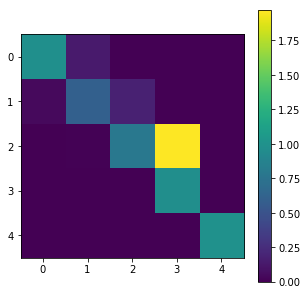

In [156]:
C = confusion_matrix(ymulti,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [157]:
def visualize_spread(arr1,y_test):
    col = []
    for i in range(0,len(arr1[0])):
        if y_test[i] == 1:
            col.append('g')
        elif y_test[i] == 2:
            col.append('y')
        elif y_test[i] == 3:
            col.append('cyan')
        elif y_test[i] == 4:
            col.append('r')
        else:
            col.append('b')
    
    plt.scatter(np.arange(len(arr1[1])),arr1[0],c=col)


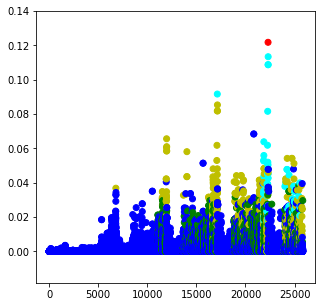

In [158]:
visualize_spread(ipmulti,yhat_ts)
#np.unique(yfinal,return_counts=True)

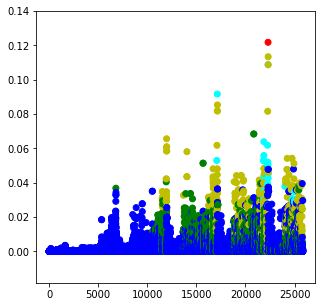

In [159]:
visualize_spread(ipmulti,ymulti)

In [160]:
#visualize_spread(ip,yxp) 

In [161]:
#visualize_spread(X_train.T,y_train) 


In [162]:
# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==3]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==2]=1
# #y=labels1
# #svc.fit(X,y)

# #labels1[avg_0_500[4]==1]=1
# #y=labels1
# #svc.fit(X,y)

# label1_values = []
# label2_values = []
# label3_values = []
# label4_values = []


# for i in range(0,len(avg_0[4])):
#     if avg_0[4][i]==1:
#         label1_values.append(avg_0.T[i])
#     elif avg_0[4][i]==2:
#         label2_values.append(avg_0.T[i])
#     elif avg_0[4][i]==3:
#         label3_values.append(avg_0.T[i])
#     elif avg_0[4][i]==4:
#         label4_values.append(avg_0.T[i])
#     else:
#         label1_values.append(avg_0.T[i])
#         label2_values.append(avg_0.T[i])
#         label3_values.append(avg_0.T[i])
#         label4_values.append(avg_0.T[i])
# label1 = np.vstack(label1_values).T
# label2 = np.vstack(label2_values).T
# label3 = np.vstack(label3_values).T
# label4 = np.vstack(label4_values).T

# label2[4][label2[4]==2]=1
# label3[4][label3[4]==3]=1
# label4[4][label4[4]==4]=1

In [163]:
# np.unique(yfinal, return_counts=True)

In [164]:
# C = confusion_matrix(yxp,yfinal)

# # Normalize the confusion matrix
# Csum = np.sum(C,1)
# C = C / Csum[None,:]

# # Print the confusion matrix
# print(np.array_str(C, precision=3, suppress_small=True))
# plt.imshow(C, interpolation='none')
# plt.colorbar()

In [165]:
#ip = np.array([avg_0[2],avg_0[5],avg_0[6]])

# yip123 = svc123.predict(ip.T)
# yip234 = svc234.predict(ip.T)

# yxp = avg_0[4]
# yxp = yxp.astype('int')

# yfinal = np.zeros(len(yxp))

# acc123= np.mean(yxp == yip123)
# acc234= np.mean(yxp == yip234)

# yfinal[np.where(yip123==1)]=1
# yfinal[np.where(yip123==2)]=2
# yfinal[np.where(yip123==3)]=3
# yfinal[np.where(yip234==2)]=2
# yfinal[np.where(yip234==3)]=3
# yfinal[np.where(yip234==4)]=4

# acc=np.mean(yfinal==yxp)
# acc


In [166]:
#C = confusion_matrix(yxp,yfinal)

# Normalize the confusion matrix
#Csum = np.sum(C,1)
#C = C / Csum[None,:]

# Print the confusion matrix
#print(np.array_str(C, precision=3, suppress_small=True))
#plt.imshow(C, interpolation='none')
#plt.colorbar()

In [104]:
#Method 2

color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr


scaled_vals=np.array([cal_diff0_1.VELOpipeFPS ,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS, cal_diff0_41.VELOpipeFPS])
scaled_vals[scaled_vals > 0.1] = 5
scaled_vals[scaled_vals <=0.01] = 6
scaled_vals[scaled_vals <=0.02] = 1
scaled_vals[scaled_vals <=0.04] = 2
scaled_vals[scaled_vals <=0.07] = 3
scaled_vals[scaled_vals <=0.1] = 4
scaled_vals[scaled_vals == 6] = 0
scaled_vals=scaled_vals.astype(int)
colors_array = color_indexer(scaled_vals)
color_indexed0_41=cal_diff0_41
color_indexed0_41['color']=colors_array[4]
color_indexed0_31=cal_diff0_31
color_indexed0_31['color']=colors_array[3]
color_indexed0_21=cal_diff0_21
color_indexed0_21['color']=colors_array[2]
color_indexed0_11=cal_diff0_11
color_indexed0_11['color']=colors_array[1]
color_indexed0_1=cal_diff0_1
color_indexed0_1['color']=colors_array[0]



In [105]:
# a1=np.array([[1,2,3,4,5]])
# a2=np.array([[5,4,3,2,1]])
# a3 = np.matmul(a1.T,a2)
# a3 = a3.T

color_picker_new=np.array([[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])


def color_indexer_new(input_arr):
    out_arr=np.zeros(len(input_arr))
    for i in range(0,len(input_arr)):
        
        out_arr[i]=(color_picker_new[input_arr[i][0]][input_arr[i][1]])
    return out_arr

In [106]:
presColor_500 = np.hstack([avgcolor_indexed0_1_500['pressureColor'], avgcolor_indexed0_11_500['pressureColor'],avgcolor_indexed0_21_500['pressureColor'],avgcolor_indexed0_31_500['pressureColor'],avgcolor_indexed0_41_500['pressureColor']])
ip_arr_0=np.array([presColor_500,avg_0_500[4]])
ip_arr_0 = ip_arr_0.T

final_combined_index_500 = color_indexer_new(ip_arr_0)

presColor = np.hstack([avgcolor_indexed0_1['pressureColor'], avgcolor_indexed0_11['pressureColor'],avgcolor_indexed0_21['pressureColor'],avgcolor_indexed0_31['pressureColor'],avgcolor_indexed0_41['pressureColor']])
ip_arr=np.array([presColor,avg_0[4]])
ip_arr = ip_arr.T

final_combined_index = color_indexer_new(ip_arr)

np.unique(final_combined_index)

array([0., 1., 2., 3., 4.])

In [107]:
X = np.array([avg_0_500[2],avg_0_500[5],avg_0_500[6]])
X=X.T

y=final_combined_index_500

y=y.astype('int')

ros = RandomOverSampler(random_state=109)

X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='linear',probability=False,  kernel="linear", C=20, gamma=.0073,verbose=10)

clf.fit(X_train,y_train)


yhat_ts = clf.predict(X_test)

acc = np.mean(yhat_ts == y_test)

acc

[LibSVM]

0.8320126782884311

In [108]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

NameError: name 'confusion_matrix' is not defined

In [109]:
visualize_spread(X_test.T,y_test) 

NameError: name 'visualize_spread' is not defined

In [ ]:
visualize_spread(X.T,y) 

In [110]:
ipmulti=np.array([avg_0[2],avg_0[5],avg_0[6]])
ymulti=final_combined_index
ymulti=ymulti.astype(int)

yhat_ts = clf.predict(ipmulti.T)

acc = np.mean(ymulti == yhat_ts)
acc

0.7564241486068112

In [111]:
C = confusion_matrix(ymulti,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

NameError: name 'confusion_matrix' is not defined

In [ ]:
# 0.095] = 5
# scaled_vals[scaled_vals <=0.01] = 6
# scaled_vals[scaled_vals <=0.025] = 1
# scaled_vals[scaled_vals <=0.05] = 2
# scaled_vals[scaled_vals <=0.075] = 3
# scaled_vals[scaled_vals <=0.095] = 4
# scaled_vals[scaled_vals == 6] =

In [138]:
color_picker=np.array([[0,0,0,0,0],[0,0,1,1,1],[0,1,2,2,2],[1,2,2,3,3],[1,2,3,3,4],[2,2,3,4,4]])
color_picker
def color_indexer(input_arr):
    out_arr=np.array(input_arr)
    for i in range(0,input_arr[0].size):
        out_arr[0,i]=color_picker[input_arr[0,i]][0]
        out_arr[1,i]=color_picker[input_arr[1,i]][1]
        out_arr[2,i]=color_picker[input_arr[2,i]][2]
        out_arr[3,i]=color_picker[input_arr[3,i]][3]
        out_arr[4,i]=color_picker[input_arr[4,i]][4]

    return out_arr

In [139]:
#Trying the data split the way prof mentioned with the std deviattions


def color_assigner(input_arr):
    lim1 = 0.06
    lim2 = 0.04
    lim3 = 0.02
    lim4 = 0.01
    lim5 = 0.01
    out_arr=np.zeros(len(input_arr))
    j=0
    
    for i in range(0, len(input_arr), 5):
        #red label
        if input_arr[i] >= lim1:
            out_arr[i]=3
            
        if input_arr[i+1]>=lim1:
            if input_arr[i] >= lim1:
                out_arr[i+1]=4
                
        if input_arr[i+2]>=lim1:
            if input_arr[i+1] >= lim1:
                if input_arr[i] >= lim1:
                    out_arr[i+2]=4
                else:
                    out_arr[i+2]=4
            else:
                out_arr[i+2]=3
        
        if input_arr[i+3]>=lim1:
            if input_arr[i+2]>=lim1:
                if input_arr[i+1] >= lim1:
                    if input_arr[i] >= lim1:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=4
                else:
                    out_arr[i+3]=4
            else:
                out_arr[i+3]=3
        
        if input_arr[i+4]>=lim1:
            if input_arr[i+3]>=lim1:
                if input_arr[i+2]>=lim1:
                    if input_arr[i+1] >= lim1:
                        if input_arr[i] >= lim1:
                            out_arr[i+4]=4
                        else:
                            out_arr[i+4]=4
                    else:
                        out_arr[i+4]=4
                else:
                    out_arr[i+4]=4
            else:
                out_arr[i+4]=3        
        
        #orange
        
        if input_arr[i] < lim1 and input_arr[i]>=lim2:
            out_arr[i]=2
            
        if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
            if input_arr[i] < lim1 and input_arr[i]>=lim2:
                out_arr[i+1]=3
                
        if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
            if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                if input_arr[i] < lim1 and input_arr[i]>=lim2:
                    out_arr[i+2]=4
                else:
                    out_arr[i+2]=3
            else:
                out_arr[i+2]=2
        
        if input_arr[i+3] < lim1 and input_arr[i+3]>=lim2:
            if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
                if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                    if input_arr[i] < lim1 and input_arr[i]>=lim2:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=4
                else:
                    out_arr[i+3]=3
            else:
                out_arr[i+3]=2
        
        if input_arr[i+4] < lim1 and input_arr[i+4]>=lim2:
            if input_arr[i+3] < lim1 and input_arr[i+3]>=lim2:
                if input_arr[i+2] < lim1 and input_arr[i+2]>=lim2:
                    if input_arr[i+1] < lim1 and input_arr[i+1]>=lim2:
                        if input_arr[i] < lim1 and input_arr[i]>=lim2:
                            out_arr[i+3]=4
                        else:
                            out_arr[i+4]=4
                    else:
                        out_arr[i+4]=4
                else:
                    out_arr[i+4]=3
            else:
                out_arr[i+4]=2 
        
        # yellow
        
        if input_arr[i] < lim2 and input_arr[i]>=lim3:
            out_arr[i]=1
        
        if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
            if input_arr[i] < lim2 and input_arr[i]>=lim3:
                out_arr[i+1]=2
                
        if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
            if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                if input_arr[i] < lim2 and input_arr[i]>=lim3:
                    out_arr[i+2]=3
                else:
                    out_arr[i+2]=2
            else:
                out_arr[i+2]=1
        
        if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
            if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                    if input_arr[i] < lim2 and input_arr[i]>=lim3:
                        out_arr[i+3]=4
                    else:
                        out_arr[i+3]=3
                else:
                    out_arr[i+3]=2
            else:
                out_arr[i+3]=1
        
        if input_arr[i+4] < lim2 and input_arr[i+4]>=lim3:
            if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
                if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                    if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                        if input_arr[i] < lim2 and input_arr[i]>=lim3:
                            out_arr[i+4]=4
                        else:
                            out_arr[i+4]=3
                    else:
                        out_arr[i+4]=3
                else:
                    out_arr[i+4]=2
            else:
                out_arr[i+4]=1
        
        #green
        
        if input_arr[i] < lim3 and input_arr[i]>=lim4:
            out_arr[i]=0
        
        if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
            if input_arr[i] < lim3 and input_arr[i]>=lim4:
                out_arr[i+1]=1
                
        if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
            if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                if input_arr[i] < lim3 and input_arr[i]>=lim4:
                    out_arr[i+2]=2
                else:
                    out_arr[i+2]=1
            else:
                out_arr[i+2]=0
        
        if input_arr[i+3] < lim3 and input_arr[i+3]>=lim4:
            if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
                if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                    if input_arr[i] < lim3 and input_arr[i]>=lim4:
                        out_arr[i+3]=3
                    else:
                        out_arr[i+3]=2
                else:
                    out_arr[i+3]=1
            else:
                out_arr[i+3]=0
        
        if input_arr[i+4] < lim3 and input_arr[i+4]>=lim4:
            if input_arr[i+3] < lim3 and input_arr[i+3]>=lim4:
                if input_arr[i+2] < lim3 and input_arr[i+2]>=lim4:
                    if input_arr[i+1] < lim3 and input_arr[i+1]>=lim4:
                        if input_arr[i] < lim3 and input_arr[i]>=lim4:
                            out_arr[i+4]=3
                        else:
                            out_arr[i+4]=3
                    else:
                        out_arr[i+4]=2
                else:
                    out_arr[i+4]=1
            else:
                out_arr[i+4]=0
    
    
        #blue
        if input_arr[i] < lim4:
            out_arr[i]=0
            
        if input_arr[i+1]<lim4:
            if input_arr[i] < lim4:
                out_arr[i+1]=0
                
        if input_arr[i+2]<lim4:
            if input_arr[i+1] < lim4:
                if input_arr[i] < lim4:
                    out_arr[i+2]=1
                else:
                    out_arr[i+2]=0
            else:
                out_arr[i+2]=0
        
        if input_arr[i+3]<lim4:
            if input_arr[i+2]<lim4:
                if input_arr[i+1] < lim4:
                    if input_arr[i] < lim4:
                        out_arr[i+3]=2
                    else:
                        out_arr[i+3]=1
                else:
                    out_arr[i+3]=0
            else:
                out_arr[i+3]=0
        
        if input_arr[i+4]<lim4:
            if input_arr[i+3]<lim4:
                if input_arr[i+2]<lim4:
                    if input_arr[i+1] < lim4:
                        if input_arr[i] < lim4:
                            out_arr[i+4]=2
                        else:
                            out_arr[i+4]=2
                    else:
                        out_arr[i+4]=1
                else:
                    out_arr[i+4]=0
            else:
                out_arr[i+4]=0
        
        
        
    return out_arr
        

In [140]:
scaled_temp=np.vstack([cal_diff0_1.VELOpipeFPS,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS,cal_diff0_41.VELOpipeFPS])
#vals=color_assigner(scaled_temp)
#np.unique(vals)
#np.unique(scaled_temp[2,:]>=0.1)

In [141]:
newArr=np.ndarray((len(avg_0_500[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1_500.VELOpipeFPS,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS,cal_diff0_41_500.VELOpipeFPS):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1
vals=color_assigner(newArr[:,0])
np.unique(vals, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([499, 233, 268,  19,   6]))

In [142]:
newArr_test=np.ndarray((len(avg_0[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1.VELOpipeFPS,cal_diff0_11.VELOpipeFPS,cal_diff0_21.VELOpipeFPS,cal_diff0_31.VELOpipeFPS,cal_diff0_41.VELOpipeFPS):
    newArr_test[o]=[i,0]
    o+=1
    newArr_test[o]=[j,1]
    o+=1
    newArr_test[o]=[k,2]
    o+=1
    newArr_test[o]=[l,3]
    o+=1
    newArr_test[o]=[m,4]
    o+=1
validation_labels=color_assigner(newArr_test[:,0])


In [143]:
np.savetxt("./data/myDataTesting.txt",newArr[:,0],delimiter=",",fmt='%s')

In [144]:

X=newArr

y=vals

ros = RandomUnderSampler(random_state=42)

#X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
#y = y.astype('int')

svc1 = svm.SVC(probability=False,  kernel="linear", C=2.3, gamma=.0073,verbose=10)
svc1.fit(X_train,y_train)


yhat_ts = svc1.predict(X_test)

acc = np.mean(y_test == yhat_ts)
acc

[LibSVM]

0.7073170731707317

In [145]:
print(newArr[0:5,0])
vals[0:5]

[0.001 0.007 0.016 0.025 0.03 ]


array([0., 0., 0., 1., 2.])

In [146]:
C = confusion_matrix(y_test,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

NameError: name 'confusion_matrix' is not defined

In [147]:
yhat_ts_full = svc1.predict(newArr_test)

acc = np.mean(validation_labels== yhat_ts_full)
print(acc)

C = confusion_matrix(validation_labels,yhat_ts_full)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

0.7599458204334365


NameError: name 'confusion_matrix' is not defined

In [148]:
np.max(cal_diff0_41_500.VELOpipeFPS)
np.max(cal_diff0_31_500.VELOpipeFPS)
np.max(cal_diff0_11_500.VELOpipeFPS)
k=0
for i in cal_diff0_31.VELOpipeFPS:
    if i>=0.07:
        k+=1
k


4

In [149]:
arr1 = np.loadtxt('./data/nodes/day5.txt')
arr2 = np.loadtxt('./data/nodes/day4.txt')
arr3 = np.loadtxt('./data/nodes/day3.txt')
arr4 = np.loadtxt('./data/nodes/day2.txt')
arr5 = np.loadtxt('./data/nodes/day1.txt')

final_arr=np.ndarray((len(arr1)*5))
o=0
for i,j,k,l,m in zip(arr1,arr2,arr3,arr4,arr5):
    final_arr[o]=i
    o+=1
    final_arr[o]=j
    o+=1
    final_arr[o]=k
    o+=1
    final_arr[o]=l
    o+=1
    final_arr[o]=m
    o+=1
np.savetxt('./data/nodes/combined_training_testing.txt',final_arr,delimiter=",",fmt='%s')



In [150]:
an_free = np.loadtxt('./data/nodes/an_free.txt')
final_arr=np.ndarray((len(an_free)*5))
o=0
for i in an_free:
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
    final_arr[o]=i
    o+=1
np.savetxt('./data/nodes/combined_an_free.txt',final_arr,delimiter=",",fmt='%s')


In [151]:
def color_assigner_greater(input_arr):
    lim1 = 0.07
    lim2 = 0.05
    lim3 = 0.03
    lim4 = 0.01
    lim5 = 0.01
    out_arr=np.zeros(len(cal_diff0_41_500.VELOpipeFPS))
    k=0
    for i in range(0, len(input_arr), 5):
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim1:
                ctr+=1
        if ctr == 1:
            out_arr[k]=3
        elif ctr>=2:
            out_arr[k]=4
            
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim2:
                ctr+=1
        if ctr >= 4 and out_arr[k] < 4:
            out_arr[k]=4
        elif ctr >= 2 and out_arr[k] < 3:
            out_arr[k]=3
        elif ctr == 1 and out_arr[k] < 2:
            out_arr[k]=2
            
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim3:
                ctr+=1
        if ctr >=4 and out_arr[k] <3:
            out_arr[k] = 3
        elif ctr >=2 and out_arr[k] <2:
            out_arr[k] = 2
        elif ctr == 1 and out_arr[k] <1:
            out_arr[k]=1
        #elif ctr == 1 and out_arr[k] <1:
        #    out_arr[k]=1
        
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]>=lim4:
                ctr+=1
        if ctr >= 4 and out_arr[k] <2:
            out_arr[k]=2
        elif ctr>=2 and out_arr[k] <1:
            out_arr[k]=1
        #elif ctr==2 and out_arr[k] < 1:
        #    out_arr[k]=1
        
        
        ctr=0
        for j in range(i,i+5):
            if input_arr[j]<lim4:
                ctr+=1
        if ctr >=4 and out_arr[k] < 1:
            out_arr[k] = 1
        
        k+=1
    
    return out_arr

In [152]:
newArr=np.ndarray((len(avg_0_500[5]),2))
o=0
for i,j,k,l,m in zip(cal_diff0_1_500.VELOpipeFPS,cal_diff0_11_500.VELOpipeFPS,cal_diff0_21_500.VELOpipeFPS,cal_diff0_31_500.VELOpipeFPS,cal_diff0_41_500.VELOpipeFPS):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1
vals=color_assigner_greater(newArr[:,0])
np.unique(vals, return_counts=True)

(array([1., 2., 3., 4.]), array([161,  39,   1,   4]))

In [153]:
newArr[425:430,0]

array([0.004, 0.037, 0.066, 0.092, 0.122])

In [154]:
#newArr and vals

from sklearn.model_selection import cross_val_score

X=newArr

y=vals

ros = RandomUnderSampler(random_state=42)

#X_res, y_res = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
#y = y.astype('int')


clf = svm.SVC(probability=False,  kernel="linear", C=10, gamma=.0073,verbose=10)
clf.fit(X_train,y_train)


yhat_ts = clf.predict(X_test)



ValueError: Found input variables with inconsistent numbers of samples: [1025, 205]

In [129]:
scores = cross_val_score(clf, X, y, cv=10)
scores

ValueError: Found input variables with inconsistent numbers of samples: [1025, 205]

In [130]:
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi = y_multi.astype('int') 

#cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
#cross_val_score(clf, X_multi, y_multi, cv=cv)

#X_multi=newArr
#y_multi=vals

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1,probability=True).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.974025974025974

In [131]:
X_multi_test=np.array([final_file_0[2],final_file_0[5]])
X_multi_test=X_multi_test.T

y_multi_test = final_file_0[4]
y_multi_test=y_multi_test.astype('int') 
#clf.predict(X_multi_test)
clf.score(X_multi_test, y_multi_test)

0.9437306501547987

In [155]:
#Trying the data split the way prof mentioned with the std deviattions


def color_assigner_latest(input_arr):
    lim1 = 0.075
    lim2 = 0.055
    lim3 = 0.025
    lim4 = 0.01
    lim5 = 0.01
    lenIp = len(input_arr)
    out_arr=np.zeros(int(lenIp/5))
    
    k=0
    for i in range(0, lenIp, 5):
        #red label
        for j in range(i,i+5):
            
            if (j+1)<lenIp:
                if input_arr[j+1]>=lim1 and (j+1)<(i+5):
                    if input_arr[j] >= lim1:
                        out_arr[k]=4

                    
            if input_arr[j] >= lim1 and out_arr[k]<3:
                out_arr[k]=3

            if (j+2)<lenIp:
                if input_arr[j+2]>=lim1 and (j+2)<(i+5) and out_arr[k]<3:
                    if input_arr[j+1] >= lim1 and (j+1)<(i+5):
                        if input_arr[j] >= lim1:
                            out_arr[k]=4

                        else:
                            out_arr[k]=4

                    elif out_arr[k]<3:
                        out_arr[k]=3
                        
            if (j+3)<lenIp:
                if input_arr[j+3]>=lim1 and (j+3)<(i+5):
                    if input_arr[j+2]>=lim1:
                        if input_arr[j+1] >= lim1:
                            if input_arr[j] >= lim1:
                                out_arr[k]=4
                            else:
                                out_arr[k]=4
                        else:
                            out_arr[k]=4
                    elif out_arr[k]<3:
                        out_arr[k]=3

            if (j+4)<lenIp:
                if input_arr[j+4]>=lim1 and (j+4)<(i+5):
                    if input_arr[j+3]>=lim1 :
                        if input_arr[j+2]>=lim1 :
                            if input_arr[j+1] >= lim1:
                                if input_arr[j] >= lim1:
                                    out_arr[k]=4
                                else:
                                    out_arr[k]=4
                            else:
                                out_arr[k]=4
                        else:
                            out_arr[k]=4
                    elif out_arr[k]<3:
                        out_arr[k]=3  
                

            #orange

            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<2 :
                out_arr[k]=2
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2 and (j+1)<(i+5):
                    if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                        out_arr[k]=3
            
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 and (j+2)<(i+5):
                    if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                        if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<3:
                        out_arr[k]=3
                elif out_arr[k]<2:
                    out_arr[k]=2
            
            if (j+3)<lenIp:
                if input_arr[j+3] < lim1 and input_arr[i+3]>=lim2 and (j+3)<(i+5):
                    if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 :
                        if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                                out_arr[k]=3
                            elif out_arr[k]<3:
                                out_arr[k]=3
                        elif out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2
            
            if (j+4)<lenIp:
                if input_arr[j+4] < lim1 and input_arr[j+4]>=lim2 and (j+4)<(i+5):
                    if input_arr[j+3] < lim1 and input_arr[j+3]>=lim2 :
                        if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2:
                            if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                                if input_arr[j] < lim1 and input_arr[j]>=lim2:
                                    out_arr[k]=4
                                elif out_arr[k]<3:
                                    out_arr[k]=3
                            elif out_arr[k]<3:
                                out_arr[k]=3
                        elif out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2 

            # yellow

            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<1:
                out_arr[i]=1
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3 and (j+1)<(i+5):
                    if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<2 :
                        out_arr[k]=2
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3 and (j+2)<(i+5):
                    if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                        if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k] < 2:
                            out_arr[k]=2
                        elif out_arr[k] < 2:
                            out_arr[k]=2
                    else:
                        out_arr[k]=1

            if (j+3)<lenIp:
                if input_arr[j+3] < lim2 and input_arr[j+3]>=lim3 and (j+3)<(1+5):
                    if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3:
                        if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<2:
                                out_arr[k]=2
                            elif out_arr[k]<2:
                                out_arr[k]=2
                        elif out_arr[k]<2:
                            out_arr[k]=2
                    elif out_arr[k]<1:
                        out_arr[k]=1
                        
            if (j+4)<lenIp:
                if input_arr[j+4] < lim2 and input_arr[i+4]>=lim3 and (j+4)<(i+5):
                    if input_arr[i+3] < lim2 and input_arr[i+3]>=lim3:
                        if input_arr[i+2] < lim2 and input_arr[i+2]>=lim3:
                            if input_arr[i+1] < lim2 and input_arr[i+1]>=lim3:
                                if input_arr[i] < lim2 and input_arr[i]>=lim3 and out_arr[k]<3:
                                    out_arr[k]=3
                                elif out_arr[k]<2:
                                    out_arr[k]=2
                            elif out_arr[k]<2:
                                out_arr[k]=2
                        elif out_arr[k]<2:
                            out_arr[k]=2
                    elif out_arr[k]<1:
                        out_arr[k]=1

            #green

            #if input_arr[j] < lim3 and input_arr[j]>=lim4:
            #    out_arr[i]=0
            if (j+1)<lenIp:
                if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4 and (j+1)<(i+5) :
                    if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<1:
                        out_arr[k]=1
            if (j+2)<lenIp:
                if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4 and (j+2)<(i+5):
                    if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                        if input_arr[i] < lim3 and input_arr[i]>=lim4 and out_arr[k]<1:
                            out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[k]=0
            if (j+3)<lenIp:
                if input_arr[j+3] < lim3 and input_arr[j+3]>=lim4 and (j+3)<(i+5):
                    if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4:
                        if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                            if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<1:
                                out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[i+3]=0
            if (j+4)<lenIp:
                if input_arr[j+4] < lim3 and input_arr[j+4]>=lim4 and (j+4)<(i+5):
                    if input_arr[j+3] < lim3 and input_arr[j+3]>=lim4:
                        if input_arr[j+2] < lim3 and input_arr[j+2]>=lim4:
                            if input_arr[j+1] < lim3 and input_arr[j+1]>=lim4:
                                if input_arr[j] < lim3 and input_arr[j]>=lim4 and out_arr[k]<2:
                                    out_arr[k]=2
                                elif out_arr[k]<1:
                                    out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    #else:
                    #    out_arr[i+4]=0


            #blue
            #if input_arr[j] < lim4:
            #    out_arr[j]=0

            #if input_arr[j+1]<lim4:
            #    if input_arr[j] < lim4:
            #        out_arr[j+1]=0
#             if (j+2)<lenIp:
#                 if input_arr[j+2]<lim4 and (j+2)<(i+5):
#                     if input_arr[j+1] < lim4:
#                         if input_arr[j] < lim4 and out_arr[k]<1:
#                             out_arr[k]=1
                        #else:
                        #    out_arr[j+2]=0
                    #else:
                    #    out_arr[j+2]=0
                    
#             if (j+3)<lenIp:
#                 if input_arr[j+3]<lim4 and (j+3)<(i+5):
#                     if input_arr[j+2]<lim4:
#                         if input_arr[j+1] < lim4:
#                             if input_arr[j] < lim4 and out_arr[k]<1:
#                                 out_arr[k]=1
#                             elif out_arr[k]<1:
#                                 out_arr[k]=1
                        #else:
                        #    out_arr[i+3]=0
                    #else:
                        #out_arr[i+3]=0
            if (j+4)<lenIp:
                if input_arr[j+4]<lim4 and (j+4)<(i+5):
                    if input_arr[j+3]<lim4:
                        if input_arr[j+2]<lim4:
                            if input_arr[j+1] < lim4:
                                if input_arr[j] < lim4 and out_arr[k]<2:
                                    out_arr[k]=2
                                elif out_arr[k]<1:
                                    out_arr[k]=1
                            elif out_arr[k]<1:
                                out_arr[k]=1
                        #else:
                        #    out_arr[i+4]=0
                    #else:
                    #    out_arr[i+4]=0
        
        k+=1
        
    return out_arr
        

In [183]:
newArr=np.ndarray((len(anomlay0_500.VELOpipeFPS)*4,2))
o=0
for j,k,l,m in zip(anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS):
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
    newArr[o]=[m,4]
    o+=1

np.savetxt("./data/combined_flows_4.txt", newArr,fmt='%s')
#vals=color_assigner_latest(newArr[:,0])
#np.unique(vals, return_counts=True)

In [184]:
newArr=np.ndarray((len(nodes0_1_500.NodePressure)*4))
o=0
for j,k,l,m in zip(nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure):
    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
    
np.savetxt("./data/combined_pressure.txt", newArr,fmt='%s')

In [185]:
newArr=np.ndarray((len(nodeArr_500.NodePressure)*4))
o=0
for j,k,l,m in zip(nodeArr_500.NodePressure,nodeArr_500.NodePressure,nodeArr_500.NodePressure,nodeArr_500.NodePressure):

    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
    
np.savetxt("./data/anomaly_free.txt", newArr,fmt='%s')

In [186]:
np.savetxt("./data/validation_pressure_name.txt", nodes0_41.NAME,fmt='%s')

In [187]:
fN = "./data/day1.csv"
day1=pd.read_csv(fN)
fN = "./data/day2.csv"
day2=pd.read_csv(fN)
fN = "./data/day3.csv"
day3=pd.read_csv(fN)
fN = "./data/day4.csv"
day4=pd.read_csv(fN)


In [188]:
newArr=np.ndarray((len(day1.Pressure)*4))
o=0
for j,k,l,m in zip(day1.Pressure,day2.Pressure,day3.Prerssure,day4.Pressure):
    newArr[o]=j
    o+=1
    newArr[o]=k
    o+=1
    newArr[o]=l
    o+=1
    newArr[o]=m
    o+=1
# np.savetxt("./data/combined_training.txt", newArr,fmt='%s')

In [189]:
fN = "./data/an_free_ind_val.csv"
an_free=pd.read_csv(fN)

newArr=np.ndarray((len(an_free.Pressure)))
o=0
for i in an_free.Pressure:
    newArr[o]=i
    o+=1

np.savetxt("./data/an_free_ind_val.txt", newArr,fmt='%s')

In [36]:
fN = "/Users/aya/Documents/MATLAB/outputs/labels.csv"
labels=pd.read_csv(fN)
newArr=np.zeros((int(len(labels)/5)))
j=0
for i in range(0,len(labels),5):
    if labels.Color[i]==1 or labels.Color[i+1]==1 or labels.Color[i+2]==1 or labels.Color[i+3]==1 or labels.Color[i+4]==1:
        newArr[j]=1
    j+=1
np.unique(newArr,return_counts=True)

(array([0., 1.]), array([ 68, 136]))

In [37]:
#all labels that are 
for i in newArr:
    print(int(i))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0


In [350]:
fN = "./data/An_free_node_epanet.csv"
an_free=pd.read_csv(fN)

an_pressure=np.ndarray((len(an_free_500.Pressure)*4))
o=0
for i in an_free.Pressure:
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
    an_pressure[o]=i
    o+=1
#np.savetxt("./data/an_free_ind_val.txt", newArr,fmt='%s')

FileNotFoundError: [Errno 2] File b'./data/An_free_node_epanet.csv' does not exist: b'./data/An_free_node_epanet.csv'

In [192]:
#normal_vel_1 = pipe_velocity_calc(nFile0)
#an_free_500=reducer(normal_vel_1)
#anomalyFreeNode_500=reducer_node(anomalyFreeNode,nodes500)

In [171]:
newArr=np.ndarray((len(an_free_500.VELOpipeFPS)*5,2))
o=0
for i in an_free_500.VELOpipeFPS:
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[i,1]
    o+=1
    newArr[o]=[i,2]
    o+=1
    newArr[o]=[i,3]
    o+=1
    newArr[o]=[i,3]
    o+=1
    
np.savetxt("./data/anomaly_free_pipes.txt", newArr,fmt='%s')

NameError: name 'an_free_500' is not defined

In [172]:
newArr=np.ndarray((len(nodes0_11_500.NodePressure)*4,2))
o=0
for i,j,k,l in zip(nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure):
    newArr[o]=[i,0]
    o+=1
    newArr[o]=[j,1]
    o+=1
    newArr[o]=[k,2]
    o+=1
    newArr[o]=[l,3]
    o+=1
#vals=color_assigner_latest(newArr[:,0])
#np.unique(vals, return_counts=True)
np.savetxt("./data/combined_pressures_4.txt", newArr,fmt='%s')

In [193]:
flow0_1 = pipe_velocity_calc(nFile1)

flow0_11 = pipe_velocity_calc(leak0_11)

flow0_21 = pipe_velocity_calc(leak0_21)

flow0_31 = pipe_velocity_calc(leak0_31)

flow0_41 = pipe_velocity_calc(leak0_41)

In [194]:
flow0_1_500=reducer(flow0_1)
flow0_11_500=reducer(flow0_11)
flow0_21_500=reducer(flow0_21)
flow0_31_500=reducer(flow0_31)
flow0_41_500=reducer(flow0_41)

In [195]:
for i in an_free_500.VELOpipeFPS:
    print(i)

NameError: name 'an_free_500' is not defined

In [ ]:
#47.3409
#46.4912
#36.3787
#186.5734383057958
#140.42229765166198
#100.54533059135716
#56.452610581961125
#5.502386616287922

In [ ]:
#ndarray of shape (n_class,)


In [196]:
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing

X_multi=np.array([final_file_0_500[2],final_file_0_500[5]])
X_multi=X_multi.T

y_multi = final_file_0_500[4]
y_multi = y_multi.astype('int') 

#cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
#cross_val_score(clf, X_multi, y_multi, cv=cv)

#X_multi=newArr
#y_multi=vals

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1,probability=True, class_weight=np.ndarray([0,1,2,6,10])).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.974025974025974

In [197]:
#Trying the data split the way prof mentioned with the std deviattions


def color_assigner_3(input_arr):
    lim1 = 0.015
    lim2 = 0.01
    lim3 = 0.001

    lenIp = len(input_arr)
    out_arr=np.zeros(int(lenIp/4))
    
    k=0
    for i in range(0, lenIp, 4):
        #red label
        for j in range(i,i+4):

                    
            if input_arr[j] >= lim1 and out_arr[k]<2:
                out_arr[k]=2
            
            if (j+1)<lenIp:
                if input_arr[j+1]>=lim1 and (j+1)<(i+4):
                    if input_arr[j] >= lim1:
                        out_arr[k]=3

            if (j+2)<lenIp:
                if input_arr[j+2]>=lim1 and (j+2)<(i+4):
                    if input_arr[j+1] >= lim1 :
                        if input_arr[j] >= lim1:
                            out_arr[k]=3

                        else:
                            out_arr[k]=3

                    elif out_arr[k]<2:
                        out_arr[k]=2
                        
            if (j+3)<lenIp:
                if input_arr[j+3]>=lim1 and (j+3)<(i+4):
                    if input_arr[j+2]>=lim1:
                        if input_arr[j+1] >= lim1:
                            if input_arr[j] >= lim1:
                                out_arr[k]=3
                            else:
                                out_arr[k]=3
                        else:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2

                

            #orange

            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<1 :
                out_arr[k]=1
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2 and (j+1)<(i+4):
                    if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<2:
                        out_arr[k]=2
            
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 and (j+2)<(i+4):
                    if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                        if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                            out_arr[k]=3
                    elif out_arr[k]<2:
                        out_arr[k]=2
                elif out_arr[k]<1:
                    out_arr[k]=1
            
            if (j+3)<lenIp:
                if input_arr[j+3] < lim1 and input_arr[i+3]>=lim2 and (j+3)<(i+4):
                    if input_arr[j+2] < lim1 and input_arr[j+2]>=lim2 :
                        if input_arr[j+1] < lim1 and input_arr[j+1]>=lim2:
                            if input_arr[j] < lim1 and input_arr[j]>=lim2 and out_arr[k]<3:
                                out_arr[k]=3
                            elif out_arr[k]<3:
                                out_arr[k]=3
                        elif out_arr[k]<2:
                            out_arr[k]=2
                    elif out_arr[k]<1:
                        out_arr[k]=1


            # yellow

            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<1:
                out_arr[i]=1
            
            if (j+1)<lenIp:
                if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3 and (j+1)<(i+4):
                    if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<1 :
                        out_arr[k]=1
            
            if (j+2)<lenIp:
                if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3 and (j+2)<(i+5):
                    if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                        if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k] < 2:
                            out_arr[k]=2
                        elif out_arr[k] < 2:
                            out_arr[k]=2
                    else:
                        out_arr[k]=1

            if (j+3)<lenIp:
                if input_arr[j+3] < lim2 and input_arr[j+3]>=lim3 and (j+3)<(1+5):
                    if input_arr[j+2] < lim2 and input_arr[j+2]>=lim3:
                        if input_arr[j+1] < lim2 and input_arr[j+1]>=lim3:
                            if input_arr[j] < lim2 and input_arr[j]>=lim3 and out_arr[k]<2:
                                out_arr[k]=2
                            elif out_arr[k]<2:
                                out_arr[k]=2
                        elif out_arr[k]<1:
                            out_arr[k]=1
                    elif out_arr[k]<1:
                        out_arr[k]=1
                        

        
        k+=1
        
    return out_arr
        

In [198]:
latest_arr=abs(newArr-an_pressure)
t=color_assigner_3(latest_arr)
for i in t:
    print(int(i))

NameError: name 'an_pressure' is not defined

In [216]:
anomlay0_500=reducer(anomlay0)
anomlay1_500=reducer(anomlay1)
anomlay2_500=reducer(anomlay2)
anomlay3_500=reducer(anomlay3)
anomlay4_500=reducer(anomlay4)
#an_free_500=reducer(an_free)
temps=np.vstack([anomlay1_500.VELOpipeFPS,anomlay2_500.VELOpipeFPS,anomlay3_500.VELOpipeFPS,anomlay4_500.VELOpipeFPS])

#an_free_1=np.hstack([an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS,an_free_500.VELOpipeFPS])

In [ ]:
# np.where(temps>(an_free_500.VELOpipeFPS+5))
#>100=9
#>70=26
#>40=103
#>10=278
ctr=0
for i in range(0,len(temps)):
    if temps[i]>(an_free_1[i]+30):
        ctr+=1
ctr

In [204]:
#60 - Red    - 42
#40 - Orange - 100
#20 - Yellow - 194

#5  - Green  - 333
#<5 - Blue   - 692

#40 - 103
#20 - 194
#10 - 278
#5  - 333


#50-78
#30-148
#10-278

#Take minimum of the 4 days!

In [ ]:
temps=np.ndarray((len(nodes0_1_500.NodePressure)*4),2)

for i,j,k,([nodes0_1_500.NodePressure,nodes0_11_500.NodePressure,nodes0_21_500.NodePressure,nodes0_31_500.NodePressure,nodes0_41_500.NodePressure])


In [223]:
temps=temps.T
temps2=temps
for i in range(0,temps.shape[0]):
    mins=min(temps[i])
    temps2[i]=temps[i]-mins
temps2=temps2.reshape(820)


In [224]:
max(temps2)

130.12082772383468